# Hotel Customer cancellation prediction

## 1 Introduction

### 1.1 Goal
To predict whether the customer will cancel the reservation or not.
Predicting the cancellation can help a business to respond maximizing empty room which will bring maximum profit

### 1.2 Install and load libraries

In [ ]:
pip install tableone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Common
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import numpy.random as rand
from tableone import TableOne, load_dataset

### 1.3 Load the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Data Science Project/hotel_bookings.csv'
df= pd.read_csv(path)

## 2 Explanatory data analysis

### 2.1 Data Overview
 The data had 32 variables and 119,390 observations {x categorical, y numerical}

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.iloc[:,0:11].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0


In [ ]:
df.iloc[:,11:22].head()

,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes
0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3
1,0,BB,PRT,Direct,Direct,0,0,0,C,C,4
2,0,BB,GBR,Direct,Direct,0,0,0,A,C,0
3,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0
4,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0
...,...,...,...,...,...,...,...,...,...,...,...
119385,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0
119386,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0
119387,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0
119388,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0


In [ ]:
df.iloc[:,22:33].head()

,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...
119385,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### 2.2 Dealing missing values
With the process of detecting Null values,  4 columns (`Children`, `country`, `agent`, `company`) in the data frame had Null values.
To comply the structure and logic of the data, 
Null values in each column were replaced as 'children' : 0, 'country' : 'unknown', 'agent' : 0, 'company' : 0.
Some observations have 0 adults, 0 children, and 0 kids. It does not make sense that a reservation has no guests, so drop those observations.

In [ ]:
# Total null value counts
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

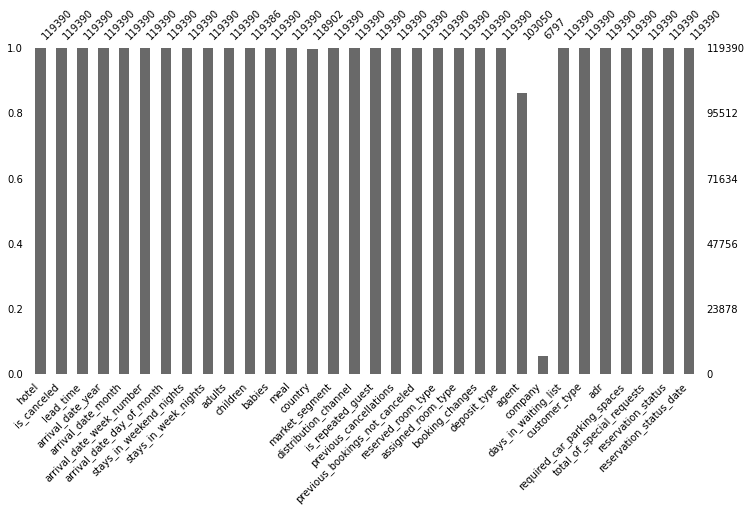

In [ ]:
# Non null value proportion 12*6
msno.bar(df, figsize=(12,6), fontsize=10)

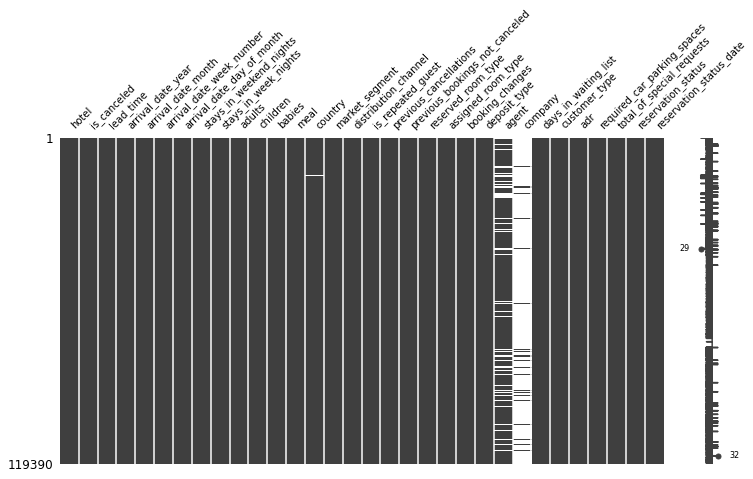

In [ ]:
# Location of Null values
msno.matrix(df, figsize=(12,6), fontsize=10)

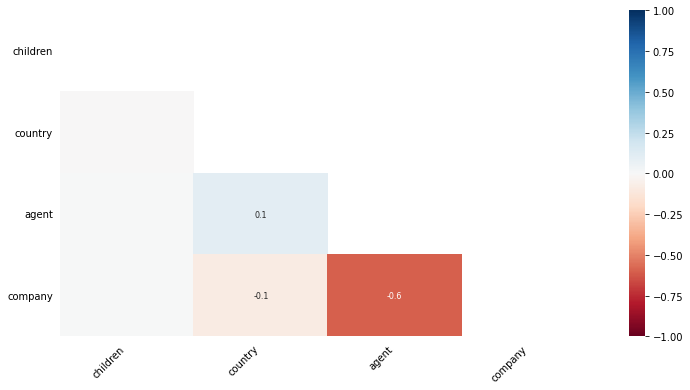

In [ ]:
# Correlation of Null values
msno.heatmap(df, figsize=(12,6), fontsize=10)

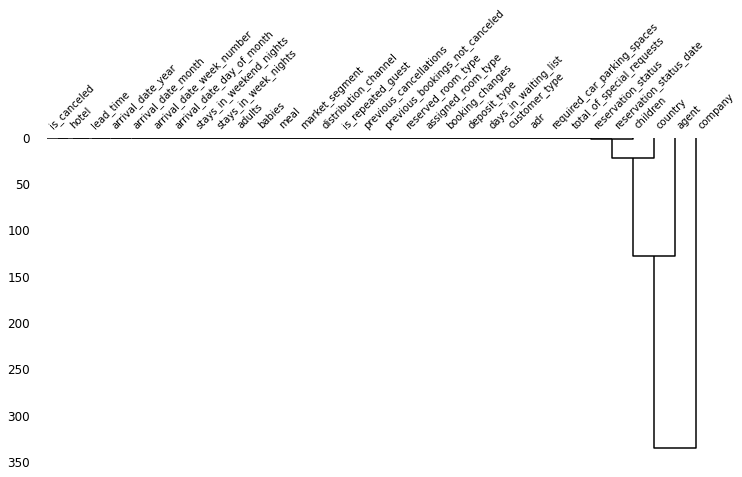

In [ ]:
# Dendrogram of Null values
msno.dendrogram(df, figsize=(12,6), fontsize=10)

In [ ]:
# Columns having Null values
df[df.columns[df.isna().any()]]

,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN
2,0.0,GBR,NaN,NaN
3,0.0,GBR,304.0,NaN
4,0.0,GBR,240.0,NaN
...,...,...,...,...
119385,0.0,BEL,394.0,NaN
119386,0.0,FRA,9.0,NaN
119387,0.0,DEU,9.0,NaN
119388,0.0,GBR,89.0,NaN


In [ ]:
# Null value proportion
df.isnull().mean()

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [ ]:
# Replacing Null values
nan_replacements = {'children':0, 'country':'unknown', 'agent':0, 'company':0}
df_cl=df.fillna(nan_replacements)
df_cl.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# Defining as 'none' the reservations that have 0 'adults', 0 'children', 0 'babies'
none= df_cl[df_cl['adults']+df_cl['children']+df_cl['babies']==0]

In [ ]:
none

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [ ]:
# Checking the column 'babies' of 'none'
none['babies']

2224      0
2409      0
3181      0
3684      0
3708      0
         ..
115029    0
115091    0
116251    0
116534    0
117087    0
Name: babies, Length: 180, dtype: int64

In [ ]:
# checking whether all 'adults' are 0
np.mean(none['adults']==0)

1.0

In [ ]:
# checking whether all 'children' are 0
np.mean(none['children']==0)

1.0

In [ ]:
# checking whether all 'babies' are 0
np.mean(none['babies']==0)

1.0

In [ ]:
# Defining the index of 'none'
none_index = none.index

In [ ]:
# Defining a new dataframe dropping 'none' rows: reservations not having any customer
df_new= df_cl.drop(none_index)

In [ ]:
# Checking no customer row check
df_new[df_new['adults']+df_new['children']+df_new['babies']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [ ]:
df_new.shape

(119210, 32)

### 2.3 Visualization
To understand data structure, visiualize data by putting 'is canceled' variable on the y-axis, and other variables on the x-axis. Depending on the data structure(numeric or categorical), drew either lineplot, scatterplot, or barplot.

In [ ]:
# Start with the total columns by 'hotel' type
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
# Average cancelltion by 'hotel' type
df_new.groupby('hotel')['is_canceled'].mean()

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: is_canceled, dtype: float64

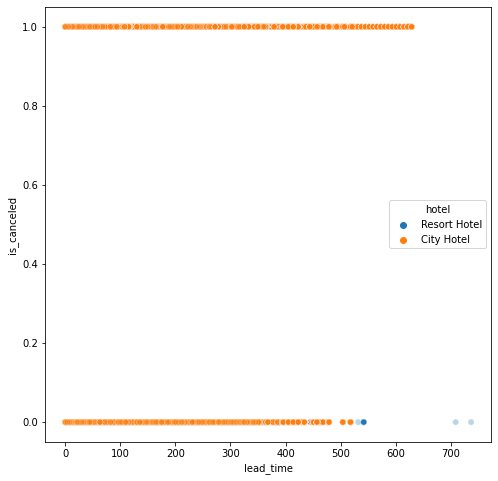

In [ ]:
# Scatter plot of 'is_canceled' vs 'lead_time' 
plt.figure(figsize=(8,8))
sns.scatterplot( x='lead_time', y = 'is_canceled',data=df_new, hue= 'hotel', alpha=0.3)

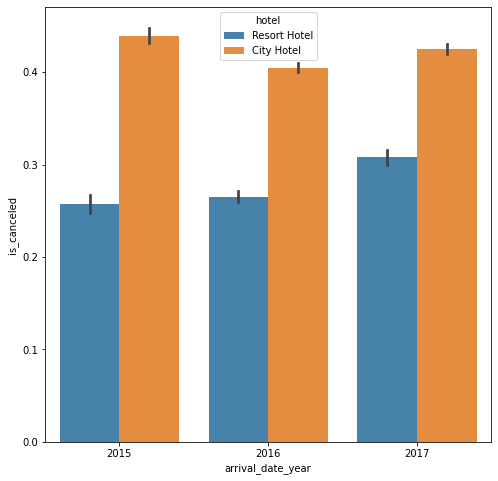

In [ ]:
# Scatter plot of 'is_canceled' vs 'arrival_date_year' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.barplot(x='arrival_date_year', y = 'is_canceled',data=df_new, hue='hotel', alpha=0.9)

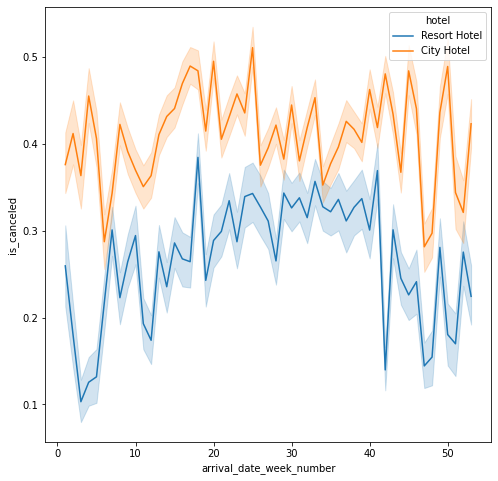

In [ ]:
# Scatter plot of 'is_canceled' vs 'arrival_date_week_number' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.lineplot(x='arrival_date_week_number', y = 'is_canceled',data=df_new, hue='hotel')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

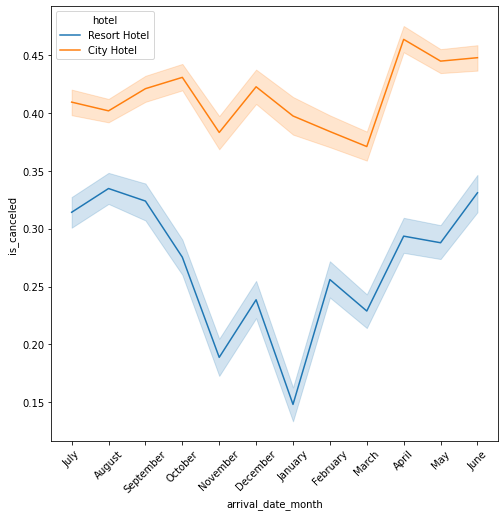

In [ ]:
# Scatter plot of 'is_canceled' vs 'arrival_date_month' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.lineplot(x='arrival_date_month', y = 'is_canceled',data=df_new, hue='hotel')
plt.xticks(rotation =45)

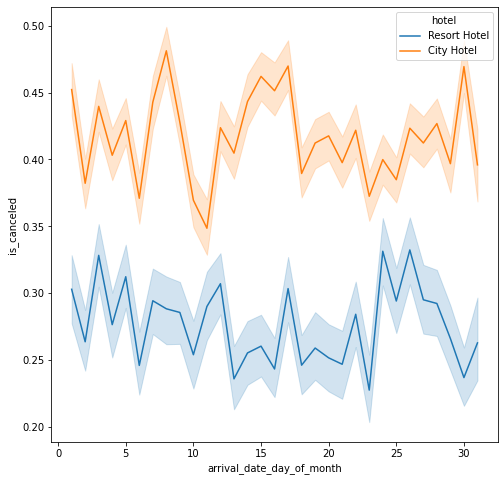

In [ ]:
# Scatter plot of 'is_canceled' vs 'arrival_date_day_of_month' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.lineplot(x='arrival_date_day_of_month', y = 'is_canceled',data=df_new, hue='hotel')

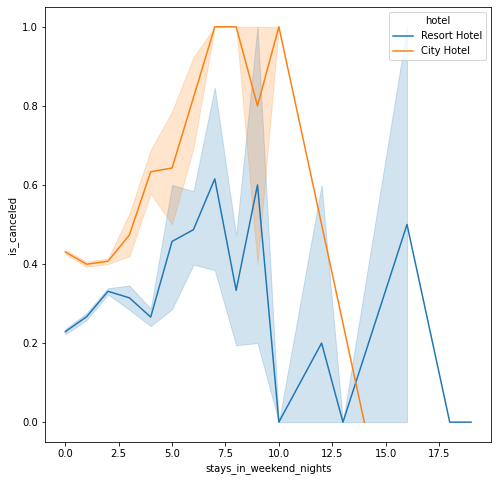

In [ ]:
# Scatter plot of 'is_canceled' vs 'stays_in_weenkend_nights' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.lineplot(x='stays_in_weekend_nights', y = 'is_canceled',data=df_new, hue='hotel')

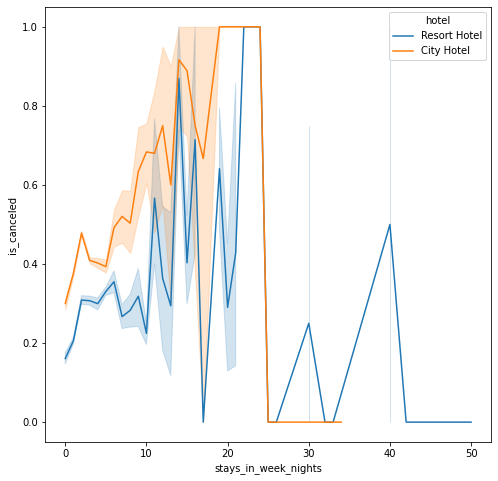

In [ ]:
# Scatter plot of 'is_canceled' vs 'stays_in_week_nights' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.lineplot(x='stays_in_week_nights', y = 'is_canceled',data=df_new, hue='hotel')

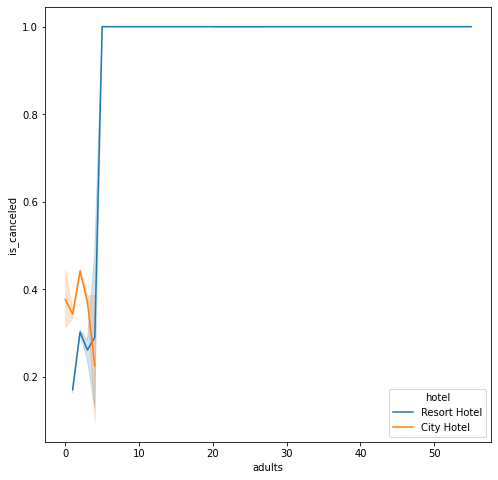

In [ ]:
# Scatter plot of 'is_canceled' vs 'adults' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.lineplot(x='adults', y = 'is_canceled',data=df_new, hue='hotel')

In [ ]:
# Removing outliers that has more than 10 'adults' in a reservation  
adult10 = df_new[df_new['adults']>10].index
df_new.drop(adult10, inplace=True)
df_new[df_new['adults']>10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


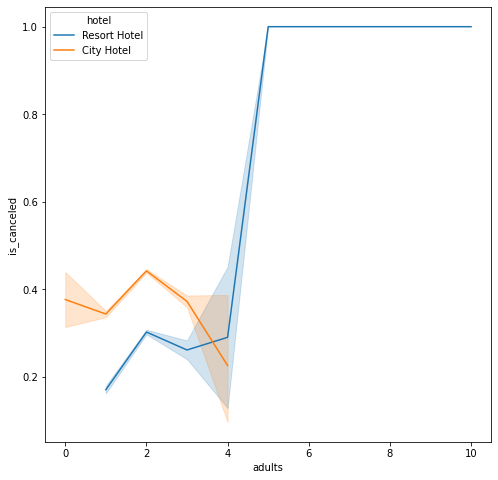

In [ ]:
# Outlier(adults > 10) removed scatter plot of'is_canceled' vs 'adults' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.lineplot(x='adults', y = 'is_canceled',data=df_new, hue='hotel')

In [ ]:
# Removing the outliers that have more than 5 'adults'
adult_over_5 = df_new[df_new['adults']>=5].index
df_new.drop(adult_over_5 , inplace=True)
df_new[df_new['adults']>=5]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


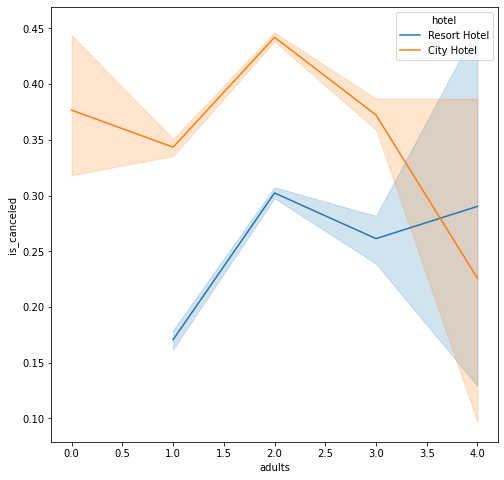

In [ ]:
# Outlier(adults > 5) removed Scatter plot of'is_canceled' vs 'adults' by 'hotel' type
plt.figure(figsize=(8,8))
sns.lineplot(x='adults', y = 'is_canceled',data=df_new, hue='hotel')

In [ ]:
# The number of customers in reservations with 0 'adults'
df_new[df_new['adults']==0].iloc[:,9:12]

,adults,children,babies
40984,0,3.0,0
41048,0,2.0,0
41446,0,2.0,0
41952,0,2.0,0
45158,0,2.0,0
...,...,...,...
117204,0,2.0,0
117274,0,2.0,0
117303,0,2.0,0
117453,0,2.0,0


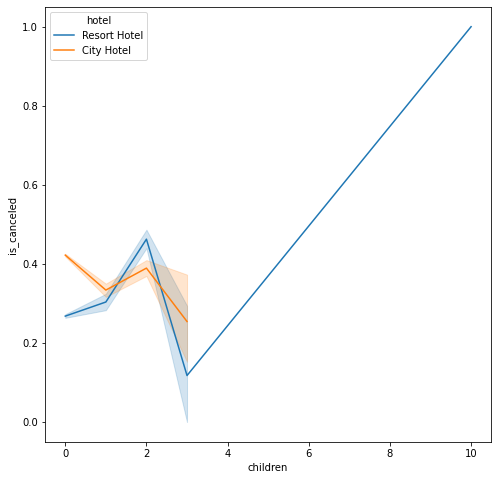

In [ ]:
# Scatter plot of 'is_canceled' vs 'children' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.lineplot(x='children', y = 'is_canceled',data=df_new, hue='hotel')

In [ ]:
# Reservations that have 'children' more than 3 
df_new[df_new['children']>3].iloc[:,10:20]

,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type
328,10.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D


In [ ]:
# Dropping rows that have 'children' > 3
child_over_3=df_new[df_new['children']>3].index
df_new.drop(child_over_3,inplace=True)
df_new[df_new['children']>3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


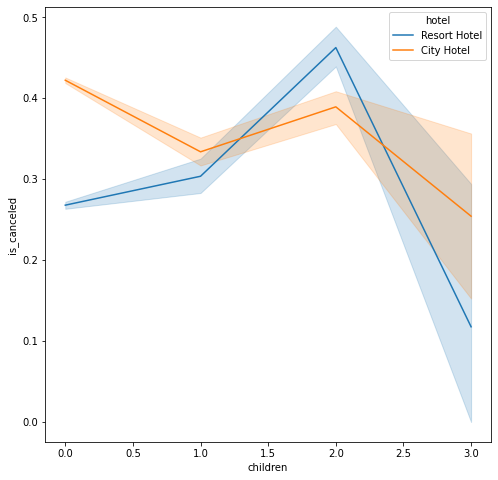

In [ ]:
# Outlier('Children' > 3) removed scatter plot of 'is_canceled' vs 'children' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.lineplot(x='children', y = 'is_canceled',data=df_new, hue='hotel')

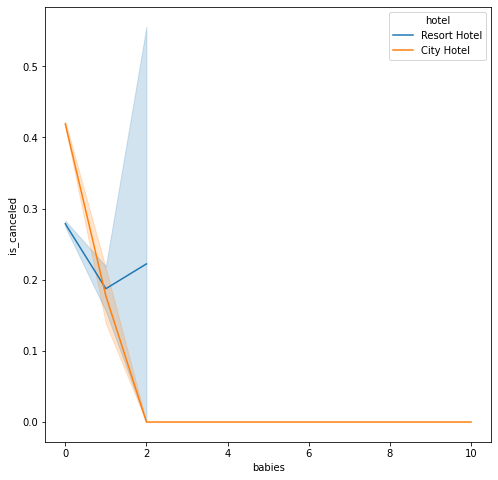

In [ ]:
# Scatter plot of 'is_canceled' vs 'babies' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.lineplot(x='babies', y = 'is_canceled',data=df_new, hue='hotel')

In [ ]:
df_new[df_new['babies']>3].iloc[:,0:10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults
46619,City Hotel,0,37,2016,January,3,12,0,2,2
78656,City Hotel,0,11,2015,October,42,11,2,1,1


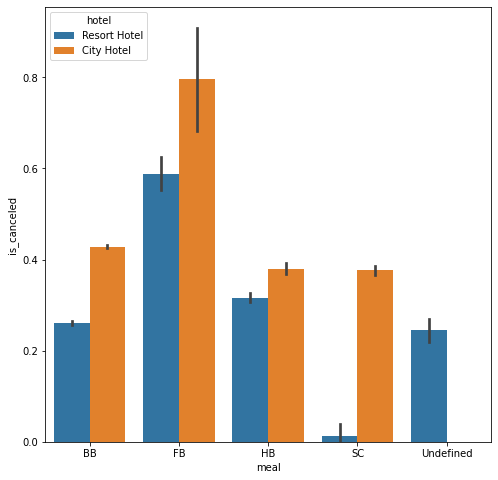

In [ ]:
# Barplot of 'is_canceled' and 'meal' by 'hotel' type
plt.figure(figsize=(8,8))
sns.barplot(x='meal', y = 'is_canceled',data=df_new, hue='hotel')

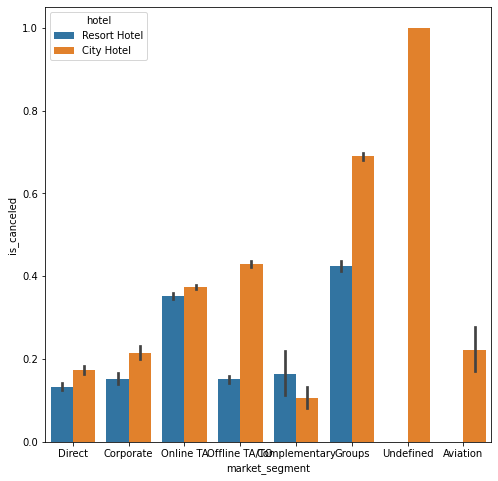

In [ ]:
# Barplot of 'is_canceled' and 'market_segment' by 'hotel' type
plt.figure(figsize=(8,8))
sns.barplot(x='market_segment', y = 'is_canceled',data=df_new, hue='hotel')

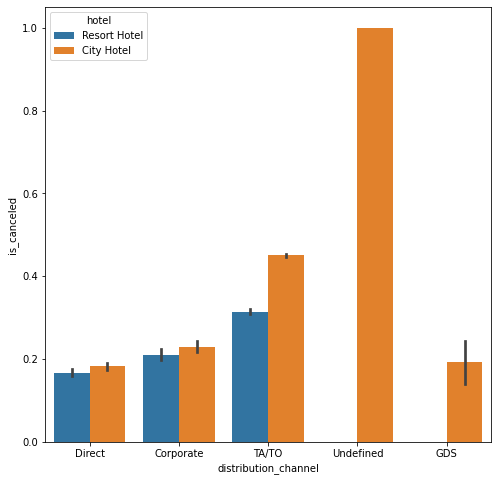

In [ ]:
# Barplot of 'is_canceled' and 'distribution_channel' by 'hotel' type
plt.figure(figsize=(8,8))
sns.barplot(x='distribution_channel', y = 'is_canceled',data=df_new, hue='hotel')

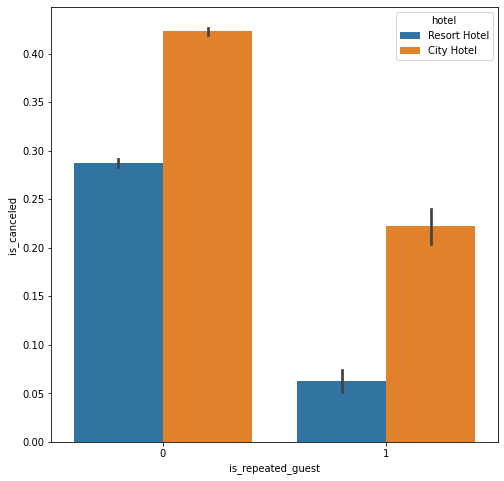

In [ ]:
# Barplot of 'is_canceled' and 'is_repeated_guest' by 'hotel' type
plt.figure(figsize=(8,8))
sns.barplot(x='is_repeated_guest', y = 'is_canceled',data=df_new, hue='hotel')

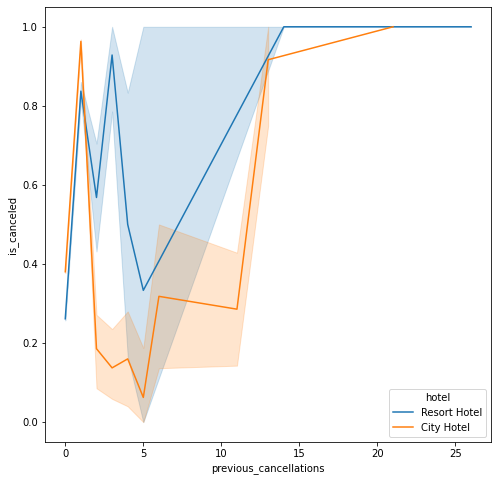

In [ ]:
# Scatter plot of 'is_canceled' and 'previous_cancellations' by 'hotel' type
plt.figure(figsize=(8,8))
sns.lineplot(x='previous_cancellations', y = 'is_canceled',data=df_new, hue='hotel')

In [ ]:
df_new[df_new['previous_cancellations']>20]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14779,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,0.0,0,Transient,50.0,0,0,Canceled,2015-01-30
14780,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,0.0,0,Transient,50.0,0,0,Canceled,2015-01-30
14781,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,0.0,0,Transient,50.0,0,0,Canceled,2015-01-30
14782,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,0.0,0,Transient,50.0,0,0,Canceled,2015-01-30
14783,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,0.0,0,Transient,50.0,0,0,Canceled,2015-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15170,Resort Hotel,1,244,2015,September,36,2,2,5,2,...,No Deposit,96.0,0.0,0,Transient-Party,8.0,0,0,Canceled,2015-06-17
15171,Resort Hotel,1,244,2015,September,36,2,2,5,2,...,No Deposit,96.0,0.0,0,Transient-Party,8.0,0,0,Canceled,2015-06-17
15172,Resort Hotel,1,244,2015,September,36,2,2,5,2,...,No Deposit,96.0,0.0,0,Transient-Party,8.0,0,0,Canceled,2015-06-17
15173,Resort Hotel,1,244,2015,September,36,2,2,5,2,...,No Deposit,96.0,0.0,0,Transient-Party,8.0,0,0,Canceled,2015-06-17


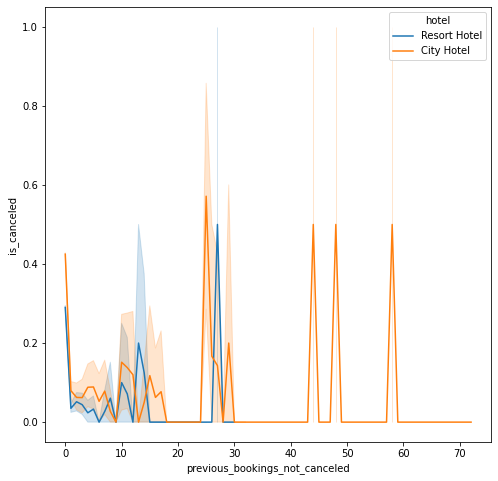

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(x='previous_bookings_not_canceled', y = 'is_canceled',data=df_new, hue='hotel')

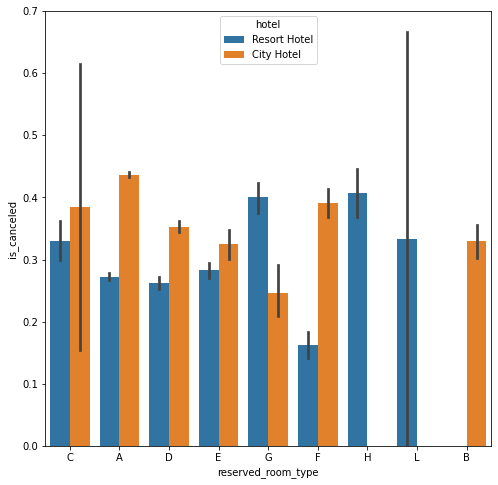

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='reserved_room_type', y = 'is_canceled',data=df_new, hue='hotel')

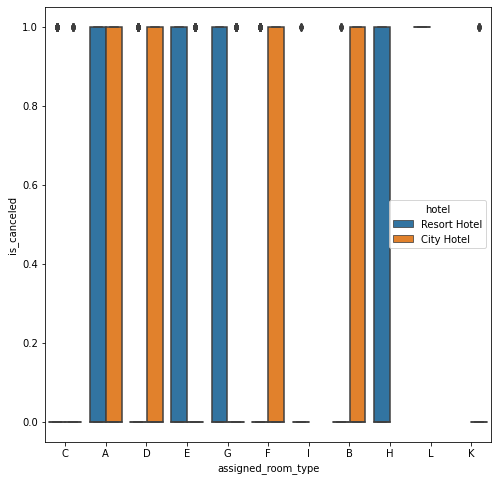

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='assigned_room_type', y = 'is_canceled',data=df_new, hue='hotel')

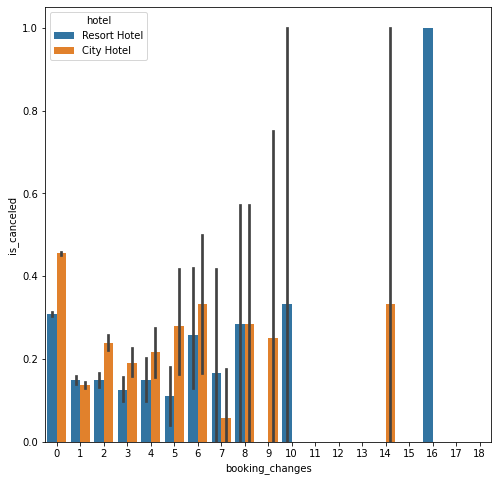

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='booking_changes', y = 'is_canceled',data=df_new, hue='hotel')

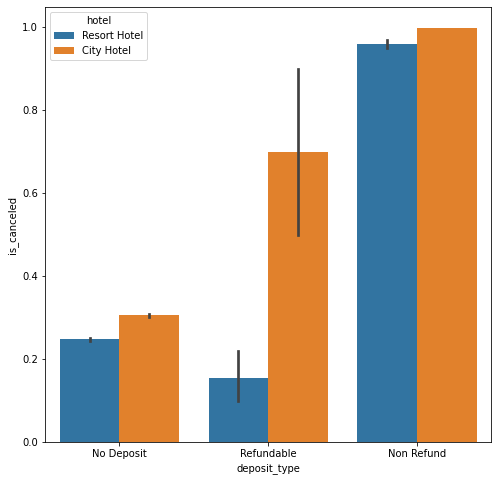

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='deposit_type', y = 'is_canceled',data=df_new, hue='hotel')

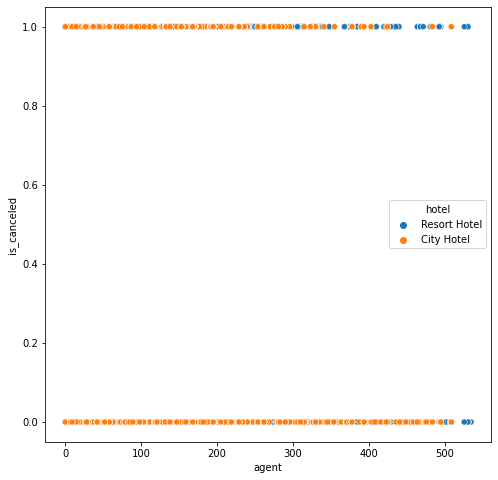

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='agent', y = 'is_canceled',data=df_new, hue='hotel')

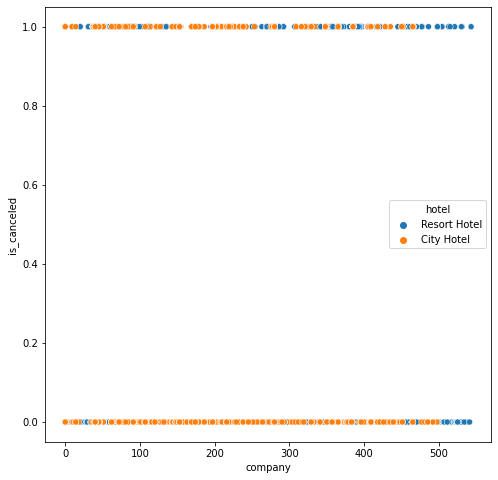

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='company', y = 'is_canceled',data=df_new, hue='hotel')

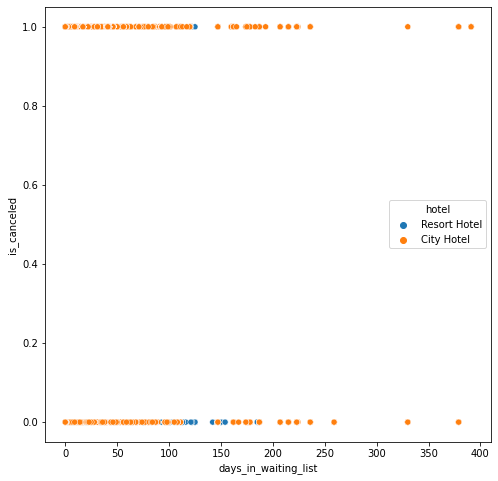

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='days_in_waiting_list', y = 'is_canceled',data=df_new, hue='hotel')

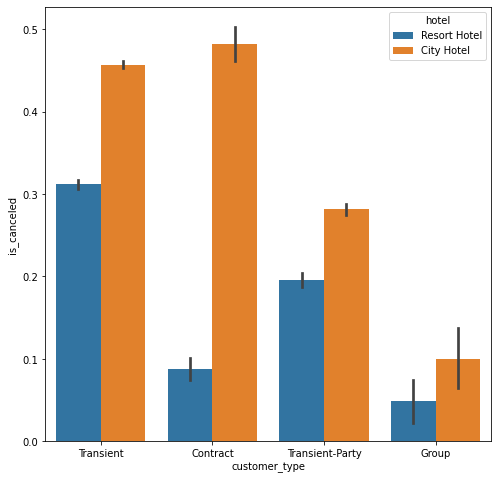

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='customer_type', y = 'is_canceled',data=df_new, hue='hotel')

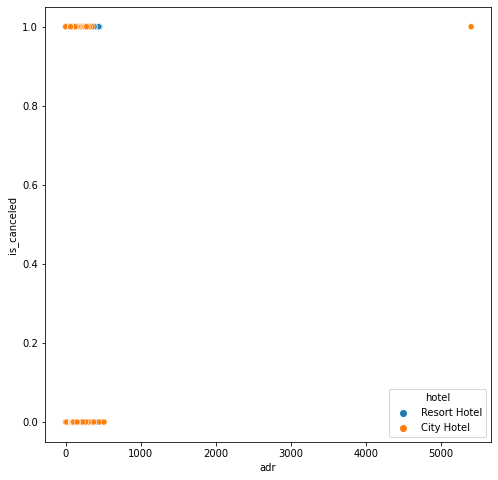

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='adr', y = 'is_canceled',data=df_new, hue='hotel')

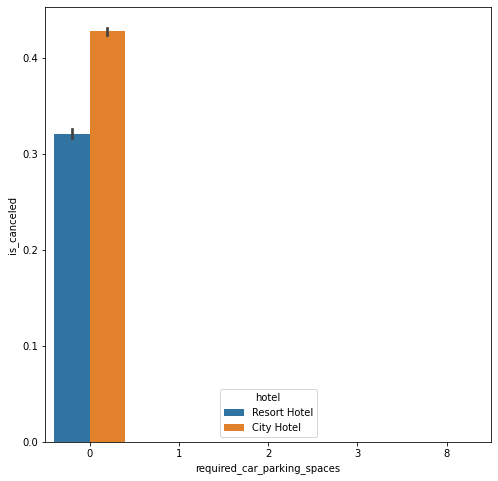

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='required_car_parking_spaces', y = 'is_canceled',data=df_new, hue='hotel')

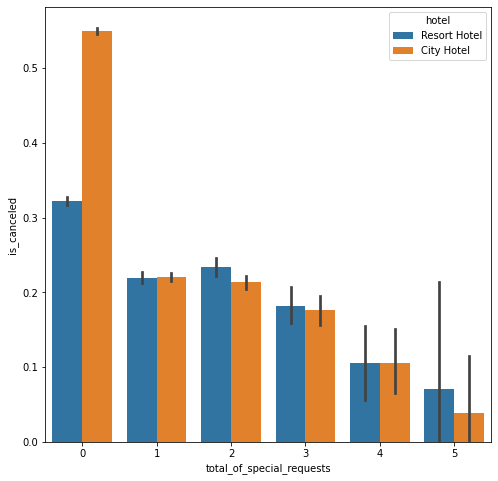

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='total_of_special_requests', y = 'is_canceled',data=df_new, hue='hotel')

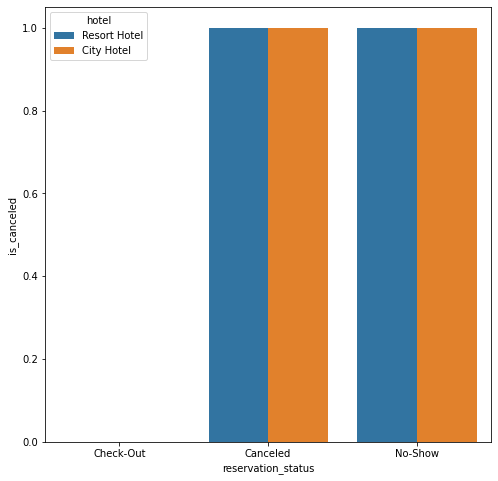

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='reservation_status', y = 'is_canceled',data=df_new, hue='hotel')

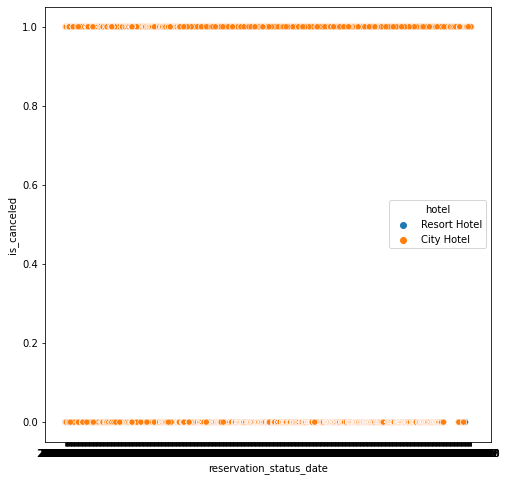

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='reservation_status_date', y = 'is_canceled',data=df_new, hue='hotel')

In [ ]:
df_r = df_new[df_new['hotel']=='Resort Hotel']
df_r

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,No Deposit,143.0,0.0,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,No Deposit,250.0,0.0,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,No Deposit,250.0,0.0,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,No Deposit,40.0,0.0,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [ ]:
# Group by 'is_canceled' by 'country'
cancel_by_country = df_new.groupby('country')['is_canceled'].sum()
print(cancel_by_country.sort_values(ascending = False).head(10))

country
PRT    27489
GBR     2452
ESP     2177
FRA     1933
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: is_canceled, dtype: int64


In [ ]:
length= df_new.groupby('country')['is_canceled'].count().sort_values(ascending = False).head(10)
length

country
PRT    48466
GBR    12120
FRA    10401
ESP     8560
DEU     7285
ITA     3761
IRL     3374
BEL     2342
BRA     2222
NLD     2103
Name: is_canceled, dtype: int64

In [ ]:
total= pd.DataFrame(length)
total

,is_canceled
country,
PRT,48466
GBR,12120
FRA,10401
ESP,8560
DEU,7285
ITA,3761
IRL,3374
BEL,2342
BRA,2222


In [ ]:
cancel=pd.DataFrame(cancel_by_country)
total.rename(columns={'is_canceled':'total'},inplace=True)

In [ ]:
country = total.join(cancel, on='country')
country.rename(columns={'is_canceled':'cancel'},inplace=True)

In [ ]:
country['cancel_rate']=country['cancel']/country['total']
cancel_rate=country.reset_index()
cancel_rate

,country,total,cancel,cancel_rate
0,PRT,48466,27489,0.567181
1,GBR,12120,2452,0.202310
2,FRA,10401,1933,0.185848
3,ESP,8560,2177,0.254322
4,DEU,7285,1218,0.167193
5,ITA,3761,1333,0.354427
6,IRL,3374,832,0.246592
7,BEL,2342,474,0.202391
8,BRA,2222,830,0.373537
9,NLD,2103,387,0.184023


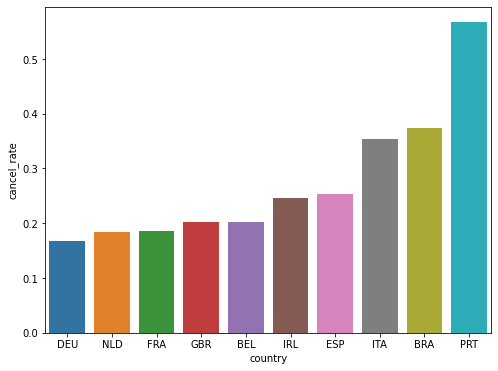

In [ ]:
# Bargraph of 'cancel_rate' and 'country' 
plt.figure(figsize=(8,6))
sns.barplot(y='cancel_rate',x='country',data=cancel_rate, order=cancel_rate.sort_values('cancel_rate').country)

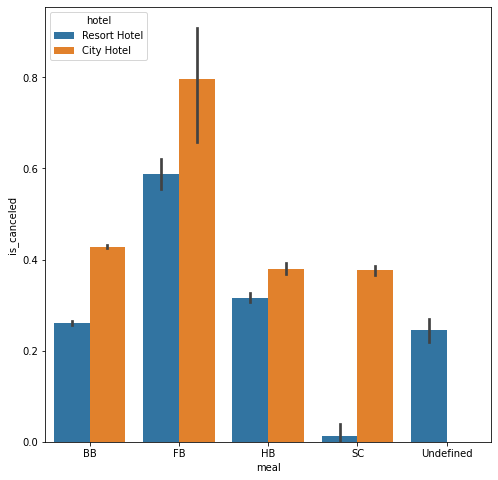

In [ ]:
# Scatter plot of 'is_canceled' and 'meal' by 'hotel' type
plt.figure(figsize=(8,8))
sns.barplot(x='meal', y = 'is_canceled',data=df_new, hue='hotel')

In [ ]:
cancel = cancel.copy
cancel

<bound method NDFrame.copy of          is_canceled
country             
ABW                0
AGO              205
AIA                0
ALB                2
AND                5
...              ...
VNM                2
ZAF               31
ZMB                1
ZWE                2
unknown           57

[178 rows x 1 columns]>

## 3 Preprocess
Based on the visualized data analysis, preprocess the data in the form that can be used in model building

In [ ]:
df_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
columns = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']
categorical=['hotel', 'is_canceled', 
       'arrival_date_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest','reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent',
       'company',  'customer_type', 
       'reservation_status', 'reservation_status_date']

In [ ]:
# Tableone analysis
table1 = TableOne(df_new, columns=columns, categorical=categorical, groupby='is_canceled', pval=True)
print(table1.tabulate(tablefmt='rst'))

=========================================  ===============  =========  =============  =============  =============  =========
..                                                          Missing    Overall        0              1              P-Value
=========================================  ===============  =========  =============  =============  =============  =========
n                                                                      119193         75011          44182
hotel, n (%)                               City Hotel       0          79163 (66.4)   46084 (61.4)   33079 (74.9)   <0.001
..                                         Resort Hotel                40030 (33.6)   28927 (38.6)   11103 (25.1)
is_canceled, n (%)                         0                0          75011 (62.9)   75011 (100.0)                 <0.001
..                                         1                           44182 (37.1)                  44182 (100.0)
lead_time, mean (SD)                      

In [ ]:
# Dropping insignificant columns 'reservation_status_date'
df2 = df_new.drop(columns='reservation_status_date')

In [ ]:
df2.drop(columns='stays_in_weekend_nights', inplace=True)

In [ ]:
df2.drop(columns='children',inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119193 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119193 non-null  object 
 1   is_canceled                     119193 non-null  int64  
 2   lead_time                       119193 non-null  int64  
 3   arrival_date_year               119193 non-null  int64  
 4   arrival_date_month              119193 non-null  object 
 5   arrival_date_week_number        119193 non-null  int64  
 6   arrival_date_day_of_month       119193 non-null  int64  
 7   stays_in_week_nights            119193 non-null  int64  
 8   adults                          119193 non-null  int64  
 9   babies                          119193 non-null  int64  
 10  meal                            119193 non-null  object 
 11  country                         119193 non-null  object 
 12  market_segment  

In [ ]:
columns2 = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 
       'stays_in_week_nights', 'adults',  'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'
       ]
categorical2=['hotel', 'is_canceled', 
       'arrival_date_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest','reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent',
       'company',  'customer_type'
       ]

In [ ]:
df2['company'].value_counts()

0.0      112425
40.0        924
223.0       784
67.0        267
45.0        249
          ...  
142.0         1
32.0          1
11.0          1
487.0         1
376.0         1
Name: company, Length: 349, dtype: int64

In [ ]:
# Combining 'company' and 'agent' as 'Integrated_agent'
df2['Integrated_agent']= df2['company']+df2['agent']

In [ ]:
df2['Integrated_agent'].value_counts(ascending= False)

9.0      31921
240.0    13918
0.0       9718
1.0       7187
14.0      3635
         ...  
692.0        1
432.0        1
347.0        1
65.0         1
301.0        1
Name: Integrated_agent, Length: 502, dtype: int64

In [ ]:
df2['Integrated_agent'].sort_values()

0           0.0
33996       0.0
33991       0.0
33989       0.0
101852      0.0
          ...  
5700      810.0
24280     810.0
24218     810.0
24278     810.0
107551    888.0
Name: Integrated_agent, Length: 119193, dtype: float64

In [ ]:
# Assigning '999' to the largest 'Integrated_agent' and define it as 'new_agent' to distinguish
df2['new_agent'] = df2['Integrated_agent'].replace(9,999)

In [ ]:
df2['new_agent'].value_counts()

999.0    31921
240.0    13918
0.0       9718
1.0       7187
14.0      3635
         ...  
692.0        1
432.0        1
347.0        1
65.0         1
301.0        1
Name: new_agent, Length: 502, dtype: int64

In [ ]:
# Assigning '998' to second largest 'new_agent' to distinguish
df2['new_agent'].replace(240,998, inplace=True)

In [ ]:
# Assigning '0' to other 'new_agent' other than '999', '998'
df2['new_agent'][df2['new_agent']<998]=0

<ipython-input-95-6c7ed0d237e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['new_agent'][df2['new_agent']<998]=0


In [ ]:
df2['new_agent'].value_counts()

0.0      73354
999.0    31921
998.0    13918
Name: new_agent, dtype: int64

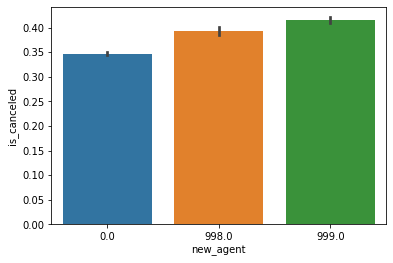

In [ ]:
# Bar plot of 'new_agent'
sns.barplot(x='new_agent',y='is_canceled', data=df2)

In [ ]:
# Dropping old columns('company', 'agent', 'Integrated_agent') reflected in 'new_agent' 
df2.drop(columns=['company','agent','Integrated_agent'],inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119193 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119193 non-null  object 
 1   is_canceled                     119193 non-null  int64  
 2   lead_time                       119193 non-null  int64  
 3   arrival_date_year               119193 non-null  int64  
 4   arrival_date_month              119193 non-null  object 
 5   arrival_date_week_number        119193 non-null  int64  
 6   arrival_date_day_of_month       119193 non-null  int64  
 7   stays_in_week_nights            119193 non-null  int64  
 8   adults                          119193 non-null  int64  
 9   babies                          119193 non-null  int64  
 10  meal                            119193 non-null  object 
 11  country                         119193 non-null  object 
 12  market_segment  

In [ ]:
# Assign 'new_agent' as a categorical variable
df2['new_agent'] = df2['new_agent'].astype(object)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119193 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119193 non-null  object 
 1   is_canceled                     119193 non-null  int64  
 2   lead_time                       119193 non-null  int64  
 3   arrival_date_year               119193 non-null  int64  
 4   arrival_date_month              119193 non-null  object 
 5   arrival_date_week_number        119193 non-null  int64  
 6   arrival_date_day_of_month       119193 non-null  int64  
 7   stays_in_week_nights            119193 non-null  int64  
 8   adults                          119193 non-null  int64  
 9   babies                          119193 non-null  int64  
 10  meal                            119193 non-null  object 
 11  country                         119193 non-null  object 
 12  market_segment  

In [ ]:
df2['reservation_status'].value_counts()

Check-Out    75011
Canceled     42977
No-Show       1205
Name: reservation_status, dtype: int64

In [ ]:
# Renaming the values of 'reservation_status'
df2['reservation_status'].replace({'Check-Out':'paid', 'Canceled':'not-paid','No-Show':'paid'},inplace= True)

In [ ]:
df2['reservation_status'].value_counts()

paid        76216
not-paid    42977
Name: reservation_status, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119193 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119193 non-null  object 
 1   is_canceled                     119193 non-null  int64  
 2   lead_time                       119193 non-null  int64  
 3   arrival_date_year               119193 non-null  int64  
 4   arrival_date_month              119193 non-null  object 
 5   arrival_date_week_number        119193 non-null  int64  
 6   arrival_date_day_of_month       119193 non-null  int64  
 7   stays_in_week_nights            119193 non-null  int64  
 8   adults                          119193 non-null  int64  
 9   babies                          119193 non-null  int64  
 10  meal                            119193 non-null  object 
 11  country                         119193 non-null  object 
 12  market_segment  

In [ ]:
# Renaming the column 'reservation_status' as 'paid'
df2.rename(columns={'reservation_status':'paid'}, inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119193 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119193 non-null  object 
 1   is_canceled                     119193 non-null  int64  
 2   lead_time                       119193 non-null  int64  
 3   arrival_date_year               119193 non-null  int64  
 4   arrival_date_month              119193 non-null  object 
 5   arrival_date_week_number        119193 non-null  int64  
 6   arrival_date_day_of_month       119193 non-null  int64  
 7   stays_in_week_nights            119193 non-null  int64  
 8   adults                          119193 non-null  int64  
 9   babies                          119193 non-null  int64  
 10  meal                            119193 non-null  object 
 11  country                         119193 non-null  object 
 12  market_segment  

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

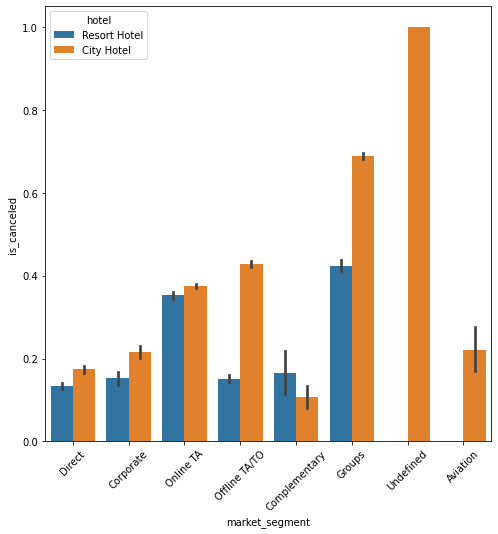

In [ ]:
# Scatter plot of 'is_canceled' and 'market_segment' by 'hotel' type
plt.figure(figsize=(8,8))
sns.barplot(x='market_segment', y = 'is_canceled',data=df2, hue='hotel')
plt.xticks(rotation=45)

In [ ]:
df2['market_segment'].value_counts()

Online TA        56408
Offline TA/TO    24176
Groups           19791
Direct           12571
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
# Categorizing the values of 'market_segment' as 'Direct' and 'Corporate'
df2['market_segment'].replace({'Undefined':'Direct','Aviation':'Corporate','Complementary':'Direct'}, inplace=True)

In [ ]:
df2['market_segment'].value_counts()

Online TA        56408
Offline TA/TO    24176
Groups           19791
Direct           13301
Corporate         5517
Name: market_segment, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

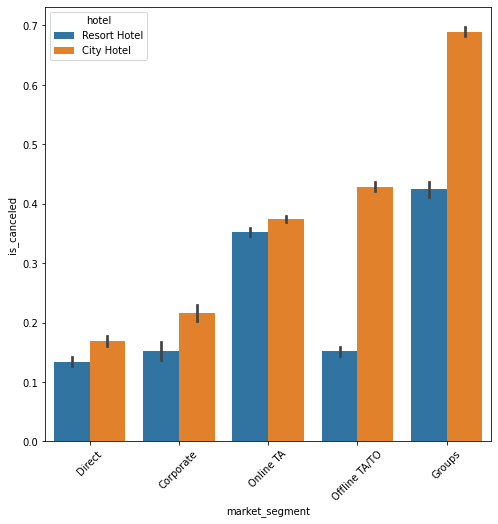

In [ ]:
# Barplot of 'is_canceled' and combined 'market_segment' by 'hotel' type
plt.figure(figsize=(8,8))
sns.barplot(x='market_segment', y = 'is_canceled',data=df2, hue='hotel')
plt.xticks(rotation=45)

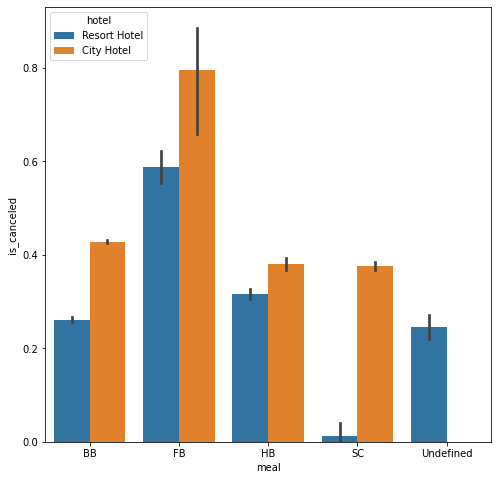

In [ ]:
# Barplot of 'is_canceled' and 'meal' by 'hotel' type
plt.figure(figsize=(8,8))
sns.barplot(x='meal', y = 'is_canceled',data=df_new, hue='hotel')

In [ ]:
df2['meal'].value_counts()

BB           92222
HB           14455
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
# Combining 'meal' into three values
df2['meal'].replace({'SC':'No_meal','Undefined':'No_meal','FB':'HB'},inplace=True)

In [ ]:
df2['meal'].value_counts()

BB         92222
HB         15253
No_meal    11718
Name: meal, dtype: int64

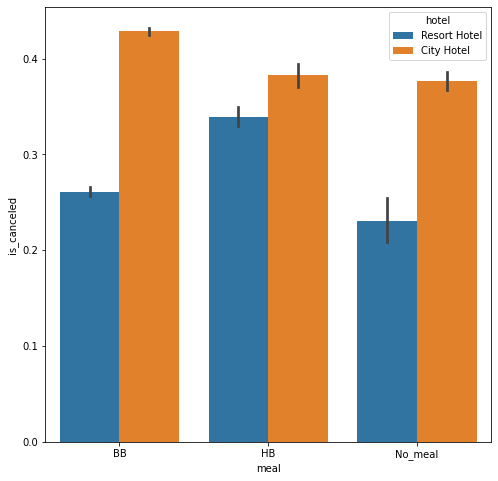

In [ ]:
# Barplot of 'is_canceled' and combined 'market_segment' by 'hotel' type
plt.figure(figsize=(8,8))
sns.barplot(x='meal', y = 'is_canceled',data=df2, hue='hotel')

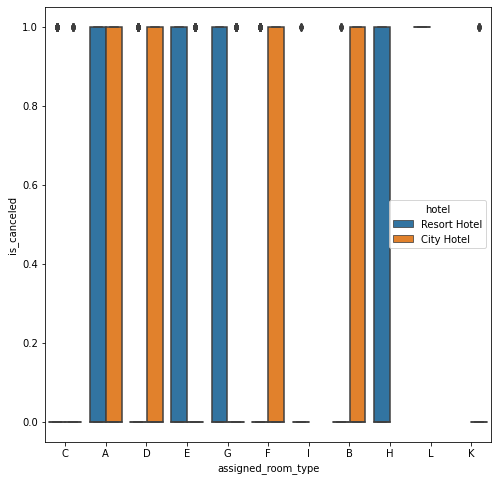

In [ ]:
# Barplot of 'is_canceled' and 'assigned_room_type' by 'hotel' type
plt.figure(figsize=(8,8))
sns.boxplot(x='assigned_room_type', y = 'is_canceled',data=df_new, hue='hotel')

In [ ]:
df2.groupby('hotel')['assigned_room_type'].value_counts()

hotel         assigned_room_type
City Hotel    A                     56977
              D                     14971
              E                      2160
              F                      2018
              B                      1995
              G                       697
              K                       187
              C                       158
Resort Hotel  A                     17031
              D                     10335
              E                      5636
              C                      2212
              G                      1852
              F                      1733
              H                       712
              I                       359
              B                       159
              L                         1
Name: assigned_room_type, dtype: int64

In [ ]:
df2.groupby(['hotel','is_canceled'])['assigned_room_type'].value_counts()

hotel         is_canceled  assigned_room_type
City Hotel    0            A                     30081
                           D                     10698
                           E                      1626
                           B                      1493
                           F                      1299
                           G                       568
                           K                       176
                           C                       143
              1            A                     26896
                           D                      4273
                           F                       719
                           E                       534
                           B                       502
                           G                       129
                           C                        15
                           K                        11
Resort Hotel  0            A                     10996
                   

In [ ]:
city = df2[df2['hotel']=='City Hotel']

In [ ]:
city

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,babies,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,paid,new_agent
40060,City Hotel,0,6,2015,July,27,1,2,1,0,...,A,0,No Deposit,0,Transient,0.00,0,0,paid,0.0
40061,City Hotel,1,88,2015,July,27,1,4,2,0,...,A,0,No Deposit,0,Transient,76.50,0,1,not-paid,999.0
40062,City Hotel,1,65,2015,July,27,1,4,1,0,...,A,0,No Deposit,0,Transient,68.00,0,1,not-paid,999.0
40063,City Hotel,1,92,2015,July,27,1,4,2,0,...,A,0,No Deposit,0,Transient,76.50,0,2,not-paid,999.0
40064,City Hotel,1,100,2015,July,27,2,2,2,0,...,A,0,No Deposit,0,Transient,76.50,0,1,not-paid,999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,5,2,0,...,A,0,No Deposit,0,Transient,96.14,0,0,paid,0.0
119386,City Hotel,0,102,2017,August,35,31,5,3,0,...,E,0,No Deposit,0,Transient,225.43,0,2,paid,999.0
119387,City Hotel,0,34,2017,August,35,31,5,2,0,...,D,0,No Deposit,0,Transient,157.71,0,4,paid,999.0
119388,City Hotel,0,109,2017,August,35,31,5,2,0,...,A,0,No Deposit,0,Transient,104.40,0,0,paid,0.0


In [ ]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,babies,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,paid,new_agent
0,Resort Hotel,0,342,2015,July,27,1,0,2,0,...,C,3,No Deposit,0,Transient,0.00,0,0,paid,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,2,0,...,C,4,No Deposit,0,Transient,0.00,0,0,paid,0.0
2,Resort Hotel,0,7,2015,July,27,1,1,1,0,...,C,0,No Deposit,0,Transient,75.00,0,0,paid,0.0
3,Resort Hotel,0,13,2015,July,27,1,1,1,0,...,A,0,No Deposit,0,Transient,75.00,0,0,paid,0.0
4,Resort Hotel,0,14,2015,July,27,1,2,2,0,...,A,0,No Deposit,0,Transient,98.00,0,1,paid,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,5,2,0,...,A,0,No Deposit,0,Transient,96.14,0,0,paid,0.0
119386,City Hotel,0,102,2017,August,35,31,5,3,0,...,E,0,No Deposit,0,Transient,225.43,0,2,paid,999.0
119387,City Hotel,0,34,2017,August,35,31,5,2,0,...,D,0,No Deposit,0,Transient,157.71,0,4,paid,999.0
119388,City Hotel,0,109,2017,August,35,31,5,2,0,...,A,0,No Deposit,0,Transient,104.40,0,0,paid,0.0


In [ ]:
resort= df2[df2['hotel']=='Resort Hotel']

In [ ]:
resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,babies,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,paid,new_agent
0,Resort Hotel,0,342,2015,July,27,1,0,2,0,...,C,3,No Deposit,0,Transient,0.00,0,0,paid,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,2,0,...,C,4,No Deposit,0,Transient,0.00,0,0,paid,0.0
2,Resort Hotel,0,7,2015,July,27,1,1,1,0,...,C,0,No Deposit,0,Transient,75.00,0,0,paid,0.0
3,Resort Hotel,0,13,2015,July,27,1,1,1,0,...,A,0,No Deposit,0,Transient,75.00,0,0,paid,0.0
4,Resort Hotel,0,14,2015,July,27,1,2,2,0,...,A,0,No Deposit,0,Transient,98.00,0,1,paid,998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,8,2,0,...,A,1,No Deposit,0,Transient,89.75,0,0,paid,0.0
40056,Resort Hotel,0,169,2017,August,35,30,9,2,0,...,E,0,No Deposit,0,Transient-Party,202.27,0,1,paid,0.0
40057,Resort Hotel,0,204,2017,August,35,29,10,2,0,...,E,0,No Deposit,0,Transient,153.57,0,3,paid,0.0
40058,Resort Hotel,0,211,2017,August,35,31,10,2,0,...,D,0,No Deposit,0,Contract,112.80,0,1,paid,0.0


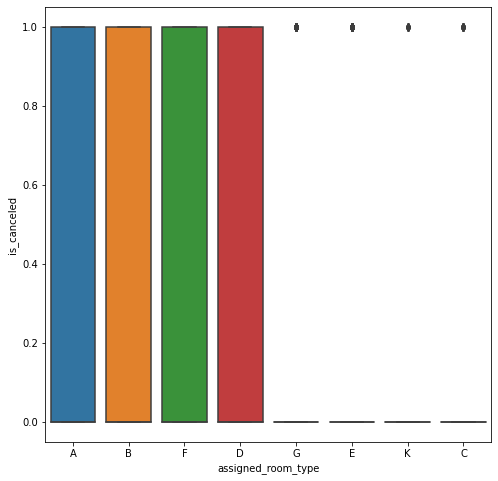

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='assigned_room_type', y = 'is_canceled',data=city)

In [ ]:
city.groupby('is_canceled')['assigned_room_type'].value_counts()

is_canceled  assigned_room_type
0            A                     30081
             D                     10698
             E                      1626
             B                      1493
             F                      1299
             G                       568
             K                       176
             C                       143
1            A                     26896
             D                      4273
             F                       719
             E                       534
             B                       502
             G                       129
             C                        15
             K                        11
Name: assigned_room_type, dtype: int64

In [ ]:
df2['assigned_room_type']= df2['assigned_room_type'].replace({'E':'Others','F':'Others','G':'Others','C':'Others','B':'Others','H':'Others','I':'Others','K':'Others','L':'Others'})

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119193 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119193 non-null  object 
 1   is_canceled                     119193 non-null  int64  
 2   lead_time                       119193 non-null  int64  
 3   arrival_date_year               119193 non-null  int64  
 4   arrival_date_month              119193 non-null  object 
 5   arrival_date_week_number        119193 non-null  int64  
 6   arrival_date_day_of_month       119193 non-null  int64  
 7   stays_in_week_nights            119193 non-null  int64  
 8   adults                          119193 non-null  int64  
 9   babies                          119193 non-null  int64  
 10  meal                            119193 non-null  object 
 11  country                         119193 non-null  object 
 12  market_segment  

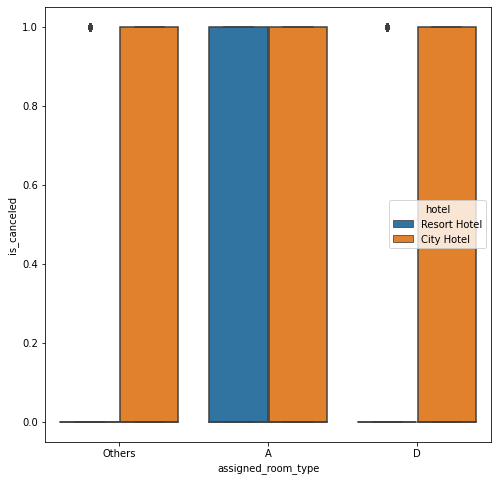

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='assigned_room_type', y = 'is_canceled',data=df2, hue='hotel')

In [ ]:
# Dropping a deterministic variable 'assigned_room_type' 
df2.drop(columns='assigned_room_type', inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119193 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119193 non-null  object 
 1   is_canceled                     119193 non-null  int64  
 2   lead_time                       119193 non-null  int64  
 3   arrival_date_year               119193 non-null  int64  
 4   arrival_date_month              119193 non-null  object 
 5   arrival_date_week_number        119193 non-null  int64  
 6   arrival_date_day_of_month       119193 non-null  int64  
 7   stays_in_week_nights            119193 non-null  int64  
 8   adults                          119193 non-null  int64  
 9   babies                          119193 non-null  int64  
 10  meal                            119193 non-null  object 
 11  country                         119193 non-null  object 
 12  market_segment  

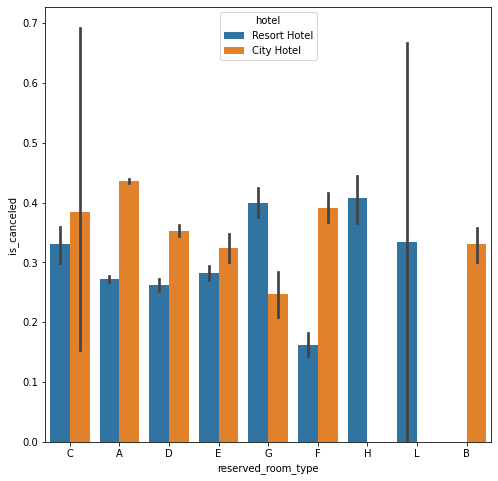

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x='reserved_room_type', y = 'is_canceled',data=df_new, hue='hotel')

In [ ]:
df2['reserved_room_type'].value_counts()

A    85861
D    19176
E     6517
F     2894
G     2092
B     1115
C      931
H      601
L        6
Name: reserved_room_type, dtype: int64

In [ ]:
# Combining the values of 'reserved_room_type'
df2['reserved_room_type']= df2['reserved_room_type'].replace({'E':'Others','F':'Others','G':'Others','C':'Others','B':'Others','H':'Others','I':'Others','K':'Others','L':'Others'})

In [ ]:
df2['reserved_room_type'].value_counts()

A         85861
D         19176
Others    14156
Name: reserved_room_type, dtype: int64

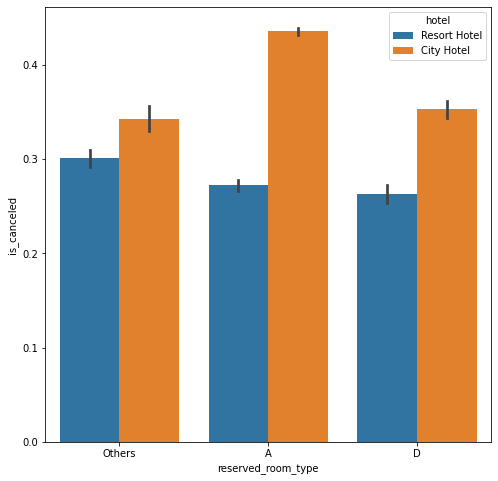

In [ ]:
# Barplot of 'is_canceled' and 'reserved_room_type' by 'hotel' type
plt.figure(figsize=(8,8))
sns.barplot(x='reserved_room_type', y = 'is_canceled',data=df2, hue='hotel')

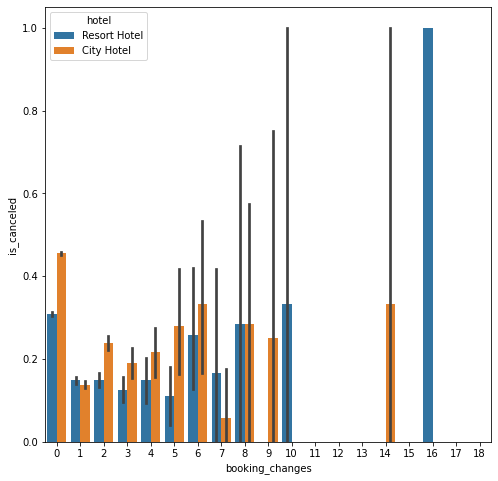

In [ ]:
# Scatter plot of 'is_canceled' and 'booking_changes' by 'hotel' type
plt.figure(figsize=(8,8))
sns.barplot(x='booking_changes', y = 'is_canceled',data=df_new, hue='hotel')

In [ ]:
df2['booking_changes'].value_counts()

0     101217
1      12665
2       3779
3        914
4        367
5        115
6         61
7         29
8         14
9          8
10         6
13         5
14         3
15         3
17         2
16         2
12         1
18         1
11         1
Name: booking_changes, dtype: int64

In [ ]:
# Categorizing 'booking_changes' into '0','1', 'others'
df2['booking_changes'][df['booking_changes']>1]=99

<ipython-input-140-837cc7efd9fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['booking_changes'][df['booking_changes']>1]=99


In [ ]:
df2['booking_changes'].value_counts()

0     101217
1      12665
99      5311
Name: booking_changes, dtype: int64

In [ ]:
# Converting 'booking_changes' into a categorical variable
df2['booking_changes'] = df2['booking_changes'].astype(object)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119193 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119193 non-null  object 
 1   is_canceled                     119193 non-null  int64  
 2   lead_time                       119193 non-null  int64  
 3   arrival_date_year               119193 non-null  int64  
 4   arrival_date_month              119193 non-null  object 
 5   arrival_date_week_number        119193 non-null  int64  
 6   arrival_date_day_of_month       119193 non-null  int64  
 7   stays_in_week_nights            119193 non-null  int64  
 8   adults                          119193 non-null  int64  
 9   babies                          119193 non-null  int64  
 10  meal                            119193 non-null  object 
 11  country                         119193 non-null  object 
 12  market_segment  

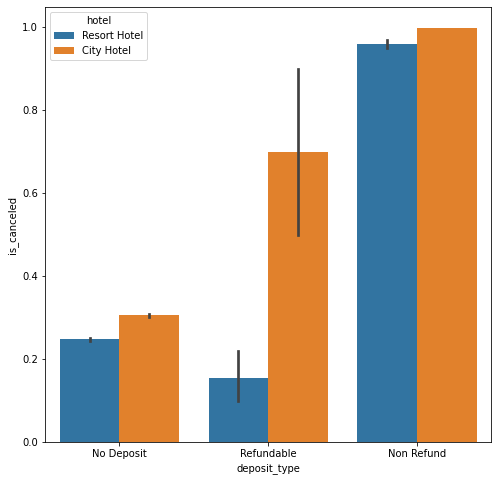

In [ ]:
# Barplot of 'is_canceled' and 'deposit_type' by 'hotel' type 
plt.figure(figsize=(8,8))
sns.barplot(x='deposit_type', y = 'is_canceled',data=df_new, hue='hotel')

In [ ]:
# Counting the values in 'deposit_type'
df2['deposit_type'].value_counts()

No Deposit    104444
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
# Combining 'Refundable' as 'No deposit' 
df2['deposit_type'].replace({'Refundable':'No Deposit'}, inplace = True)

In [ ]:
# After combining values in 'deposit_type'
df2['deposit_type'].value_counts()

No Deposit    104606
Non Refund     14587
Name: deposit_type, dtype: int64

In [ ]:
# Renaming the value in 'deposit_type'
df2['deposit_type'].replace({'No Deposit':'Refundable& No Deposit'}, inplace = True)

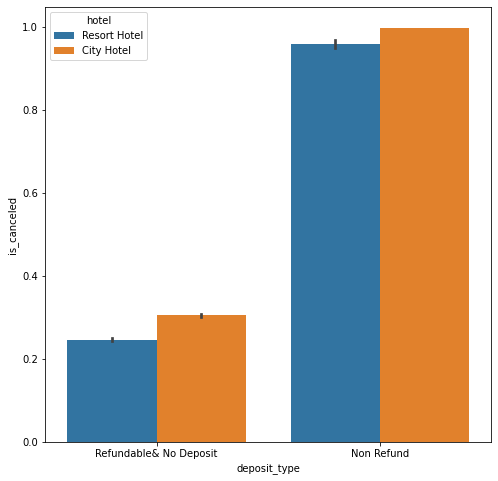

In [ ]:
# Bar plot of 'is_canceled' and 'deposit_type' after the combination
plt.figure(figsize=(8,8))
sns.barplot(x='deposit_type', y = 'is_canceled',data=df2, hue='hotel')

In [ ]:
# The counts of value in 'days_in_waiting_list'
df2['days_in_waiting_list'].value_counts()

0      115500
39        227
58        164
44        141
31        127
        ...  
175         1
116         1
142         1
193         1
36          1
Name: days_in_waiting_list, Length: 127, dtype: int64

In [ ]:
# Combining values > 1 in 'days_in_waiting_list'
df2['days_in_waiting_list'][df['days_in_waiting_list']>1]=1

<ipython-input-151-b5879067bfb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['days_in_waiting_list'][df['days_in_waiting_list']>1]=1


In [ ]:
# After integrating the values of 'day_in_waiting_list'
df2['days_in_waiting_list'].value_counts()

0    115500
1      3693
Name: days_in_waiting_list, dtype: int64

In [ ]:
# Value counts of 'customer_type'
df2['customer_type'].value_counts()

Transient          89476
Transient-Party    25088
Contract            4071
Group                558
Name: customer_type, dtype: int64

In [ ]:
# Integrating the minor values in 'customer_type'
df2['customer_type'].replace({'Transient-Party':'other','Contract':'other','Group':'other'},inplace=True)

In [ ]:
# Value counts of 'customer_type'
df2['customer_type'].value_counts()

Transient    89476
other        29717
Name: customer_type, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


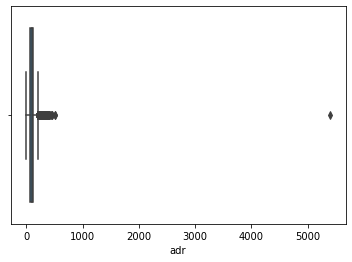

In [ ]:
# Boxplot of 'adr' which stands for average daily rate
sns.boxplot('adr', data=df2)

In [ ]:
# Sorting values of 'adr' in ascending order
df2['adr'].sort_values()

14969       -6.38
0            0.00
26765        0.00
63711        0.00
63605        0.00
           ...   
13142      450.00
103912     451.50
15083      508.00
111403     510.00
48515     5400.00
Name: adr, Length: 119193, dtype: float64

In [ ]:
# Removing a outlier in 'adr'
df2['adr'].replace(5400,0, inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


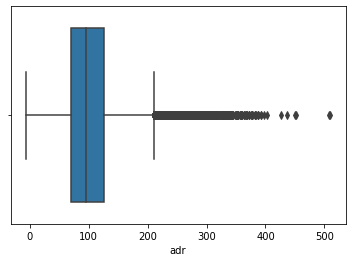

In [ ]:
# Boxplot of 'adr' after removing the outlier
sns.boxplot('adr', data=df2)

In [ ]:
# Checking whether there exists 'adr' = 0, which means customers did not pay for the stay
df2[df2['adr']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,adults,babies,...,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,paid,new_agent
0,Resort Hotel,0,342,2015,July,27,1,0,2,0,...,Others,99,Refundable& No Deposit,0,Transient,0.0,0,0,paid,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,2,0,...,Others,99,Refundable& No Deposit,0,Transient,0.0,0,0,paid,0.0
125,Resort Hotel,0,32,2015,July,27,4,1,4,0,...,Others,99,Refundable& No Deposit,0,Transient,0.0,0,1,paid,0.0
167,Resort Hotel,0,111,2015,July,28,6,0,2,0,...,A,0,Refundable& No Deposit,0,Transient,0.0,0,2,paid,998.0
168,Resort Hotel,0,0,2015,July,28,6,0,1,0,...,Others,0,Refundable& No Deposit,0,Transient,0.0,0,0,paid,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118631,City Hotel,0,78,2017,August,34,23,0,1,0,...,A,99,Refundable& No Deposit,0,other,0.0,0,0,paid,0.0
118762,City Hotel,0,1,2017,August,34,24,1,2,0,...,A,1,Refundable& No Deposit,0,Transient,0.0,0,3,paid,0.0
118963,City Hotel,0,1,2017,August,35,27,0,2,0,...,A,0,Refundable& No Deposit,0,Transient,0.0,0,0,paid,0.0
119102,City Hotel,0,518,2017,August,34,26,1,1,0,...,A,1,Refundable& No Deposit,0,other,0.0,0,0,paid,0.0


In [ ]:
# Normalizing 'adr'
bb= np.sqrt(df2['adr'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


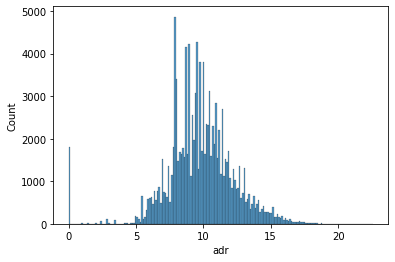

In [ ]:
# Normalized histogram of 'adr'
sns.histplot(bb)

In [ ]:
# Value counts of 'required_car_parking_spaces'
df2['required_car_parking_spaces'].value_counts()

0    111784
1      7376
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [ ]:
# Combing the values of 'required_car_parking_spaces' greater than 0 to 1
df2['required_car_parking_spaces'][df['required_car_parking_spaces']>0]=1

<ipython-input-164-031ec9fbf23a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['required_car_parking_spaces'][df['required_car_parking_spaces']>0]=1


In [ ]:
# Value counts of integrated 'required_car_parking_spaces'
df2['required_car_parking_spaces'].value_counts()

0    111784
1      7409
Name: required_car_parking_spaces, dtype: int64

In [ ]:
# Convert the type of 'required_car_parking_spaces'
df2['required_car_parking_spaces'] = df2['required_car_parking_spaces'].astype(object)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119193 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119193 non-null  object 
 1   is_canceled                     119193 non-null  int64  
 2   lead_time                       119193 non-null  int64  
 3   arrival_date_year               119193 non-null  int64  
 4   arrival_date_month              119193 non-null  object 
 5   arrival_date_week_number        119193 non-null  int64  
 6   arrival_date_day_of_month       119193 non-null  int64  
 7   stays_in_week_nights            119193 non-null  int64  
 8   adults                          119193 non-null  int64  
 9   babies                          119193 non-null  int64  
 10  meal                            119193 non-null  object 
 11  country                         119193 non-null  object 
 12  market_segment  

In [ ]:
# Renaming the value 1 as '1 or more' in 'required_car_parking_spaces'
df2['required_car_parking_spaces'].replace('1','1 or more', inplace=True)

In [ ]:
# Value counts of 'required_car_parking_spaces'
df2['required_car_parking_spaces'].value_counts()

0    111784
1      7409
Name: required_car_parking_spaces, dtype: int64

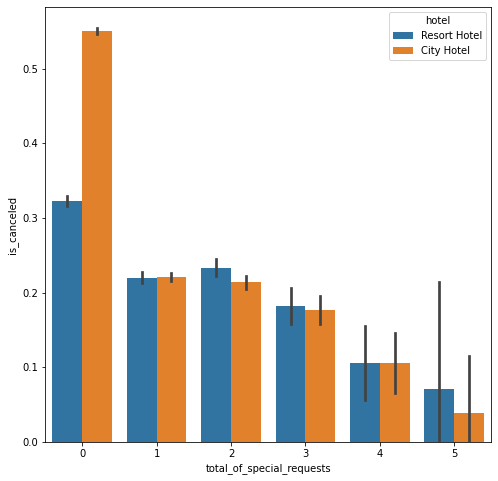

In [ ]:
# Barplot of 'is_canceled' and 'total_of_special_requests' by 'hotel' type
plt.figure(figsize=(8,8))
sns.barplot(x='total_of_special_requests', y = 'is_canceled',data=df_new, hue='hotel')

In [ ]:
# Value counts of 'total_of_special_requests'
df2['total_of_special_requests'].value_counts()

0    70185
1    33182
2    12952
3     2494
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [ ]:
# Integrating the values > 2 as 2 in 'total_of_special_requests'
df2['total_of_special_requests'][df2['total_of_special_requests']>2]=2

<ipython-input-172-5d6e0da4dbc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_of_special_requests'][df2['total_of_special_requests']>2]=2


In [ ]:
# Value counts of 'total_of_special_requests' after the integration
df2['total_of_special_requests'].value_counts()

0    70185
1    33182
2    15826
Name: total_of_special_requests, dtype: int64

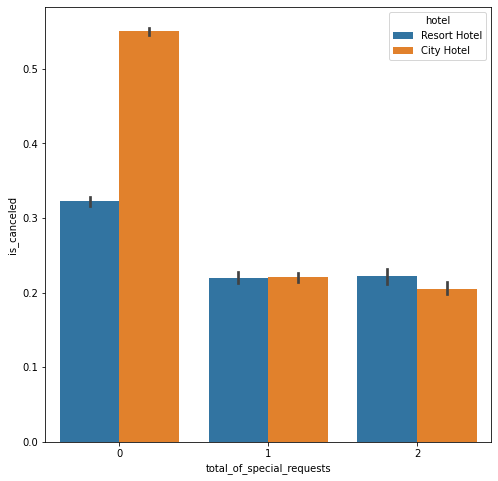

In [ ]:
# Barplot after the integration
plt.figure(figsize=(8,8))
sns.barplot(x='total_of_special_requests', y = 'is_canceled',data=df2, hue='hotel')

In [ ]:
# Tableone analysis
table3 = TableOne(df2, groupby='is_canceled', pval=True)

In [ ]:
print(table3.tabulate(tablefmt='rst'))

=====================================  ======================  =========  =============  =============  =============  =========
..                                                             Missing    Overall        0              1              P-Value
=====================================  ======================  =========  =============  =============  =============  =========
n                                                                         119193         75011          44182
hotel, n (%)                           City Hotel              0          79163 (66.4)   46084 (61.4)   33079 (74.9)   <0.001
..                                     Resort Hotel                       40030 (33.6)   28927 (38.6)   11103 (25.1)
lead_time, n (%)                       0                       0          6264 (5.3)     5847 (7.8)     417 (0.9)      <0.001
..                                     1                                  3445 (2.9)     3127 (4.2)     318 (0.7)
..                    

In [ ]:
# Value counts of 'stay_in_week_nights'
df2['stays_in_week_nights'].value_counts()

2     33669
1     30292
3     22238
5     11057
4      9543
0      7571
6      1494
10     1029
7      1024
8       654
9       228
15       85
11       55
19       43
12       42
20       39
14       35
13       27
16       15
21       15
22        7
25        6
18        6
30        4
17        4
24        3
40        2
33        1
42        1
50        1
32        1
26        1
34        1
Name: stays_in_week_nights, dtype: int64

In [ ]:
# Integrating the values of 'stays_in_week_nights' > 5 as 99
df2['stays_in_week_nights'][df2['stays_in_week_nights']>5]=99

<ipython-input-178-4b5447be3c14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['stays_in_week_nights'][df2['stays_in_week_nights']>5]=99


In [ ]:
# Value counts of 'stays_in_week_nights'
df2['stays_in_week_nights'].value_counts(normalize=True)

2     0.282475
1     0.254142
3     0.186571
5     0.092766
4     0.080063
0     0.063519
99    0.040464
Name: stays_in_week_nights, dtype: float64

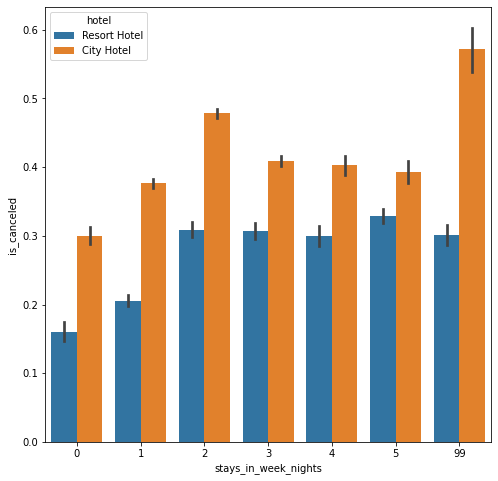

In [ ]:
# Barplot of 'is_canceled' and 'stays_in_week_nights' by 'hotel' type
plt.figure(figsize=(8,8))
sns.barplot(x='stays_in_week_nights', y = 'is_canceled',data=df2, hue='hotel')

In [ ]:
# Integrating the values of 'stays_in_week_nights' > 5 as 6
df2['stays_in_week_nights'].replace(99,6, inplace= True)

In [ ]:
# Sort values after the integration
df2['stays_in_week_nights'].value_counts().sort_values()

6     4823
0     7571
4     9543
5    11057
3    22238
1    30292
2    33669
Name: stays_in_week_nights, dtype: int64

In [ ]:
# Value counts of 'arrival_date_week_number'
df2['arrival_date_week_number'].value_counts()

33    3576
30    3082
32    3041
34    3039
18    2923
21    2853
28    2843
17    2803
20    2781
29    2762
42    2747
31    2739
41    2691
15    2683
27    2664
25    2661
38    2659
23    2619
35    2587
39    2575
22    2545
24    2498
13    2414
16    2404
19    2397
40    2395
26    2386
43    2352
44    2270
14    2264
37    2223
8     2212
36    2164
10    2142
9     2109
7     2102
12    2076
11    2065
45    1940
53    1811
49    1780
47    1677
46    1570
6     1507
50    1498
48    1495
4     1485
5     1385
3     1318
2     1216
52    1187
1     1045
51     933
Name: arrival_date_week_number, dtype: int64

In [ ]:
# Value counts of 'adults'
df2['adults'].value_counts()

2    89679
1    23027
3     6202
0      223
4       62
Name: adults, dtype: int64

In [ ]:
# Value counts of 'babies'
df2['babies'].value_counts()

0     118276
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [ ]:
# Integrating the values of
df2['babies'][df2['babies']>1]=1

<ipython-input-186-867f347e6679>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['babies'][df2['babies']>1]=1


In [ ]:
# Value counts of 'babies'
df2['babies'].value_counts()

0    118276
1       917
Name: babies, dtype: int64

In [ ]:
# Value counts of 'country'
df2['country'].value_counts()

PRT    48466
GBR    12120
FRA    10401
ESP     8560
DEU     7285
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64

In [ ]:
# Integrating 'PRT' of 'country' as 'others'
df2['country'][df2['country']!='PRT']='others'

<ipython-input-189-bdd8313f96ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['country'][df2['country']!='PRT']='others'


In [ ]:
# Value counts of 'country' after the integration
df2['country'].value_counts()

others    70727
PRT       48466
Name: country, dtype: int64

In [ ]:
# Value counts of 'distribution_channel'
df2['distribution_channel'].value_counts()

TA/TO        97744
Direct       14600
Corporate     6651
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
# Integrating the values of 'distribution_channel'
df2['distribution_channel'].replace({'Direct':'others','Corporate':'others','GDS':'others','Undefined':'others'},inplace=True)

In [ ]:
# Value counts after integrating
df2['distribution_channel'].value_counts()

TA/TO     97744
others    21449
Name: distribution_channel, dtype: int64

In [ ]:
# Value counts of 'is_repeated_guest'
df2['is_repeated_guest'].value_counts()

0    115438
1      3755
Name: is_repeated_guest, dtype: int64

In [ ]:
# Value counts of 'previous_cancellations'
df2['previous_cancellations'].value_counts()

0     112714
1       6048
2        114
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [ ]:
# Integrating the value of 'previous_cancellations' > 0 as 1
df2['previous_cancellations'][df2['previous_cancellations']>0]=1

<ipython-input-196-b4bc8b1a3feb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['previous_cancellations'][df2['previous_cancellations']>0]=1


In [ ]:
# Value counts of 'previous_cancellations' after the integrating
df2['previous_cancellations'].value_counts()

0    112714
1      6479
Name: previous_cancellations, dtype: int64

In [ ]:
# Value counts of 'previous =_bookings_not_canceled'
df2['previous_bookings_not_canceled'].value_counts()

0     115580
1       1538
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

In [ ]:
# Integrating the value of 'previous_booking_not_canceled' > 0 as 1
df2['previous_bookings_not_canceled'][df2['previous_bookings_not_canceled']>0]=1

<ipython-input-199-bd0b84d228ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['previous_bookings_not_canceled'][df2['previous_bookings_not_canceled']>0]=1


In [ ]:
# Value counts after the integration
df2['previous_bookings_not_canceled'].value_counts()

0    115580
1      3613
Name: previous_bookings_not_canceled, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119193 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119193 non-null  object 
 1   is_canceled                     119193 non-null  int64  
 2   lead_time                       119193 non-null  int64  
 3   arrival_date_year               119193 non-null  int64  
 4   arrival_date_month              119193 non-null  object 
 5   arrival_date_week_number        119193 non-null  int64  
 6   arrival_date_day_of_month       119193 non-null  int64  
 7   stays_in_week_nights            119193 non-null  int64  
 8   adults                          119193 non-null  int64  
 9   babies                          119193 non-null  int64  
 10  meal                            119193 non-null  object 
 11  country                         119193 non-null  object 
 12  market_segment  

In [ ]:
# Explicitly naming the whole and categorical columns of the model
columns_2 = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 
       'stays_in_week_nights', 'adults',  'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
        'booking_changes', 'deposit_type', 'new_agent',
        'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'
       ]
categorical_2=['hotel', 'is_canceled', 
       'arrival_date_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest','reserved_room_type',
        'deposit_type', 'new_agent',
         'customer_type'
       ]

In [ ]:
# Tableone analysis
table2 = TableOne(df2, columns=columns_2, categorical=categorical_2, groupby='is_canceled', pval=True)
print(table2.tabulate(tablefmt='rst'))

=========================================  ======================  =========  =============  =============  =============  =========
..                                                                 Missing    Overall        0              1              P-Value
=========================================  ======================  =========  =============  =============  =============  =========
n                                                                             119193         75011          44182
hotel, n (%)                               City Hotel              0          79163 (66.4)   46084 (61.4)   33079 (74.9)   <0.001
..                                         Resort Hotel                       40030 (33.6)   28927 (38.6)   11103 (25.1)
is_canceled, n (%)                         0                       0          75011 (62.9)   75011 (100.0)                 <0.001
..                                         1                                  44182 (37.1)                  

In [ ]:
# Columns after the integration
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'adults', 'babies',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'paid', 'new_agent'],
      dtype='object')

In [ ]:
# Value counts of 'booking_changes'
df2['booking_changes'].value_counts()

0     101217
1      12665
99      5311
Name: booking_changes, dtype: int64

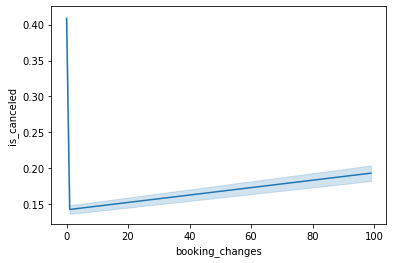

In [ ]:
# Lineplot of 'is_canceled' and 'booking_changes'
sns.lineplot(x='booking_changes',y='is_canceled',data=df2)

In [ ]:
# Integrating the values of 'booking_changes' > 0 as 2
df2['booking_changes'][df2['booking_changes']>0]=2

<ipython-input-207-1580bdca5ef3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['booking_changes'][df2['booking_changes']>0]=2


In [ ]:
# Value counts after the integration
df2['booking_changes'].value_counts()

0    101217
2     17976
Name: booking_changes, dtype: int64

In [ ]:
# Integrating the values of 'booking_changes'>1 as 2
df2['booking_changes'].replace({2:1}, inplace=True)

In [ ]:
# Value counts of 'booking_changes' after the integration
df2['booking_changes'].value_counts()

0    101217
1     17976
Name: booking_changes, dtype: int64

In [ ]:
# Columns after dropping variables
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'adults', 'babies',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'paid', 'new_agent'],
      dtype='object')

In [ ]:
df2.drop(columns= 'paid', inplace = True)

In [ ]:
# The list of whole and categorical columns
columns3 = [col for col in df2.columns]
       
categorical3=['hotel', 'is_canceled', 
       'arrival_date_month', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest','reserved_room_type',
        'deposit_type', 'new_agent',
         'customer_type']


In [ ]:
table5 = TableOne(df2, groupby='is_canceled', columns=columns3, categorical = categorical3,  pval=True)

In [ ]:
print(table5.tabulate(tablefmt='rst'))

=========================================  ======================  =========  =============  =============  =============  =========
..                                                                 Missing    Overall        0              1              P-Value
=========================================  ======================  =========  =============  =============  =============  =========
n                                                                             119193         75011          44182
hotel, n (%)                               City Hotel              0          79163 (66.4)   46084 (61.4)   33079 (74.9)   <0.001
..                                         Resort Hotel                       40030 (33.6)   28927 (38.6)   11103 (25.1)
is_canceled, n (%)                         0                       0          75011 (62.9)   75011 (100.0)                 <0.001
..                                         1                                  44182 (37.1)                  

In [ ]:
continuous_variables = [col for col in columns3 if col not in categorical3]

In [ ]:
continuous_variables

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_week_nights',
 'adults',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
df2['lead_time'].value_counts().sort_values()

463       1
709       1
424       1
458       1
380       1
       ... 
4      1710
3      1815
2      2065
1      3445
0      6264
Name: lead_time, Length: 479, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e1693d9d0>,
      dtype=object)

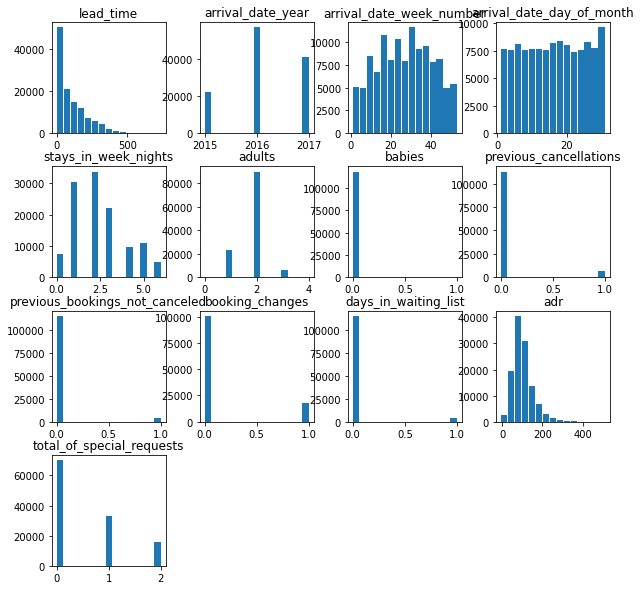

In [ ]:
df2[continuous_variables].hist(figsize=(10,10), grid=False, rwidth=0.9, bins=15)

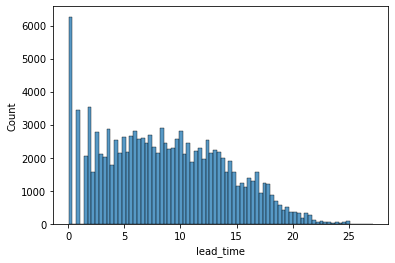

In [ ]:
sns.histplot(np.sqrt(df2['lead_time']+0.001))

In [ ]:
df2['lead_time']=np.sqrt(df2['lead_time'])

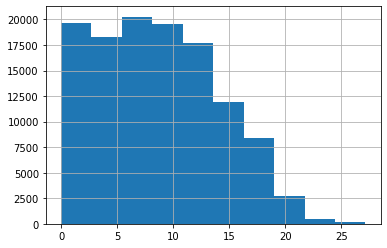

In [ ]:
df2['lead_time'].hist()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


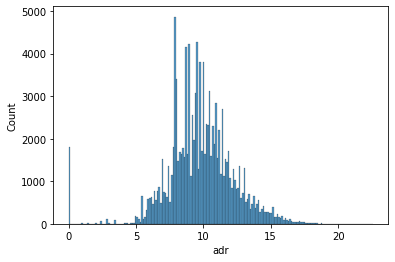

In [ ]:
sns.histplot(np.sqrt(df2['adr']))

In [ ]:
df2['adr']=np.sqrt(df2['adr'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


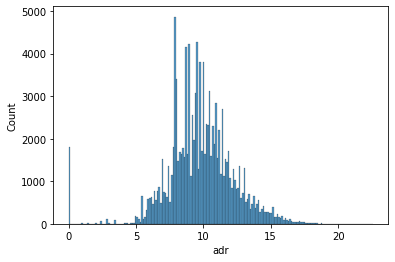

In [ ]:
sns.histplot((df2['adr']))

In [ ]:
len(categorical3)+len(continuous_variables)

26

In [ ]:
df2.shape

(119193, 26)

In [ ]:
df2.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_week_nights                 7
adults                               5
babies                               2
meal                                 3
country                              2
market_segment                       5
distribution_channel                 2
is_repeated_guest                    2
previous_cancellations               2
previous_bookings_not_canceled       2
reserved_room_type                   3
booking_changes                      2
deposit_type                         2
days_in_waiting_list                 2
customer_type                        2
adr                               8863
required_car_parking_spaces          2
total_of_special_requests            3
new_agent                

In [ ]:
cat= df2.nunique()[df2.nunique()<4].keys().tolist()

In [ ]:
len(cat)

18

In [ ]:
numeric = [col for col in df2.columns if col not in cat]

In [ ]:
len(numeric)

8

In [ ]:
target=['is_canceled']

In [ ]:
target

['is_canceled']

In [ ]:
cat.remove(target[0])

In [ ]:
cat_encode = pd.get_dummies(data=df2, columns=cat, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
cat

['hotel',
 'arrival_date_year',
 'babies',
 'meal',
 'country',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'new_agent']

In [ ]:
categorical3[1]

'is_canceled'

In [ ]:
categoric = categorical3.remove(target[0])

In [ ]:
encoded = pd.get_dummies(data=df2, columns = categoric, drop_first=True)

In [ ]:
scaled_numerical = scaler.fit_transform(df2[continuous_variables])

In [ ]:
scaled_numerical = pd.DataFrame(scaled_numerical, columns=continuous_variables)

In [ ]:
df_processed = df2.drop(columns=continuous_variables, axis=1)

In [ ]:
df4= df_processed.merge(right=scaled_numerical, how='left', left_index=True, right_index=True)

In [ ]:
df4

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,...,stays_in_week_nights,adults,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,July,BB,PRT,Direct,others,0,Others,Refundable& No Deposit,...,-1.575066,0.297333,-0.088051,-0.239754,-0.176804,2.372904,-0.178813,-3.895587,-0.257448,-0.758980
1,Resort Hotel,0,July,BB,PRT,Direct,others,0,Others,Refundable& No Deposit,...,-1.575066,0.297333,-0.088051,-0.239754,-0.176804,2.372904,-0.178813,-3.895587,-0.257448,-0.758980
2,Resort Hotel,0,July,BB,others,Direct,others,0,A,Refundable& No Deposit,...,-0.920335,-1.769502,-0.088051,-0.239754,-0.176804,-0.421425,-0.178813,-0.445798,-0.257448,-0.758980
3,Resort Hotel,0,July,BB,others,Corporate,others,0,A,Refundable& No Deposit,...,-0.920335,-1.769502,-0.088051,-0.239754,-0.176804,-0.421425,-0.178813,-0.445798,-0.257448,-0.758980
4,Resort Hotel,0,July,BB,others,Online TA,TA/TO,0,A,Refundable& No Deposit,...,-0.265604,0.297333,-0.088051,-0.239754,-0.176804,-0.421425,-0.178813,0.047850,-0.257448,0.636354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,August,BB,others,Offline TA/TO,TA/TO,0,A,Refundable& No Deposit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119386,City Hotel,0,August,BB,others,Online TA,TA/TO,0,Others,Refundable& No Deposit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119387,City Hotel,0,August,BB,others,Online TA,TA/TO,0,D,Refundable& No Deposit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119388,City Hotel,0,August,BB,others,Online TA,TA/TO,0,A,Refundable& No Deposit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
df5 = df4.apply(LabelEncoder().fit_transform)

## 4 Modeling

### 4.1 Importing libraries & prepare feature, target

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score, KFold, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn import set_config
from sklearn.neural_network import MLPClassifier 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df3 = df2.apply(LabelEncoder().fit_transform) 

In [ ]:
X2 = df5.drop(columns='is_canceled')
y2 = df5['is_canceled']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=17)

### 4.2 Logistic Regression

default logistic regression accuracy:0.72, precision:0.71, recall: 0.43

In [ ]:
L1_logreg = LogisticRegression(penalty= 'l1', solver= 'liblinear', C=1)
L1_logreg.fit(X_train2, y_train2)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
L1_logreg_y_pred = L1_logreg.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(L1_logreg.score(X_test2, y_test2)))

Accuracy of logistic regression classifier on test set: 0.80


In [ ]:
print("Precision:",precision_score(y_test2, L1_logreg_y_pred))
print("Recall:",recall_score(y_test2, L1_logreg_y_pred))

Precision: 0.7791054967565723
Recall: 0.622533418204965


In [ ]:
logit_acc= L1_logreg.score(X_test2, y_test2)
logit_pre= precision_score(y_test2, L1_logreg_y_pred)
logit_recall = recall_score(y_test2, L1_logreg_y_pred)

In [ ]:
print(classification_report(y_test2,L1_logreg_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85     18802
           1       0.78      0.62      0.69     10997

    accuracy                           0.80     29799
   macro avg       0.79      0.76      0.77     29799
weighted avg       0.79      0.80      0.79     29799



In [ ]:
C= [1, .5, .25, .1, .05, .025, .01, .005, .0025]
L1_metrics = np.zeros((len(C),5))
L1_metrics[:,0]=C
for index in range(0, len(C)):
    logit = LogisticRegression(penalty='l1',C=C[index], solver='liblinear')
    logit.fit(X_train2,y_train2)
    pred_test_Y = logit.predict(X_test2)
    L1_metrics[index,1] = np.count_nonzero(logit.coef_)
    L1_metrics[index,2] = accuracy_score(y_test2, pred_test_Y)
    L1_metrics[index,3] = precision_score(y_test2, pred_test_Y)
    L1_metrics[index,4] = recall_score(y_test2, pred_test_Y)
col_names = ['C','Non-zero Coeffs', 'Accuracy','Precision','Recall']
print(pd.DataFrame(L1_metrics, columns=col_names))

        C  Non-zero Coeffs  Accuracy  Precision    Recall
0  1.0000             25.0  0.795329   0.778866  0.621988
1  0.5000             25.0  0.795396   0.778853  0.622261
2  0.2500             25.0  0.795463   0.779157  0.622079
3  0.1000             24.0  0.795429   0.779706  0.621169
4  0.0500             23.0  0.795060   0.779173  0.620533
5  0.0250             22.0  0.794859   0.779853  0.618805
6  0.0100             23.0  0.792745   0.778188  0.613167
7  0.0050             18.0  0.790664   0.778141  0.605347
8  0.0025             16.0  0.790865   0.784342  0.597618


In [ ]:
coefficients = pd.concat([pd.DataFrame(X_train2.columns),
pd.DataFrame(np.transpose(L1_logreg.coef_))], axis = 1)
coefficients.columns = ['Feature', 'Coefficient']
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])
coefficients = coefficients[coefficients['Coefficient']!=0]
print(coefficients.sort_values(by=['Coefficient']))

                           Feature  Coefficient  Exp_Coefficient
8                     deposit_type    -4.759930         0.008566
3                          country    -1.790163         0.166933
23     required_car_parking_spaces    -1.756910         0.172577
6                is_repeated_guest    -1.011003         0.363854
19  previous_bookings_not_canceled    -0.768988         0.463482
20                 booking_changes    -0.740494         0.476878
24       total_of_special_requests    -0.646448         0.523903
5             distribution_channel    -0.617558         0.539260
9                    customer_type    -0.327093         0.721016
4                   market_segment    -0.013846         0.986250
1               arrival_date_month    -0.012226         0.987848
14       arrival_date_day_of_month    -0.000306         0.999694
22                             adr     0.000067         1.000067
11                       lead_time     0.004624         1.004635
13        arrival_date_we

In [ ]:
logit_model=sm.Logit(y_train2,X_train2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.421781
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                89394
Model:                          Logit   Df Residuals:                    89369
Method:                           MLE   Df Model:                           24
Date:                Wed, 18 Jan 2023   Pseudo R-squ.:                  0.3606
Time:                        16:33:08   Log-Likelihood:                -37705.
converged:                       True   LL-Null:                       -58965.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
hotel                              0.0955      0.024      4.014     

In [ ]:
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_test2, y_test2)
clf.predict(X_test2)
clf.score(X_test2, y_test2)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.7906641162455116

In [ ]:
scores = cross_val_score(clf, X_train2, y_train2, cv=10)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

KeyboardInterrupt: ignored

In [ ]:
print('Cross-Validation Accuracy Scores', scores)

In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

### 4.3 Ensemble Learning 

In [ ]:
SEED = 1
lr=LogisticRegression(random_state=SEED)
knn=KNN()
dt= DecisionTreeClassifier(random_state=SEED)

classifiers=[('Logistic Regression', lr),
             ('K Nearest Neighbors', knn),
             ('Decision Tree',dt)]

In [ ]:
for clf_name, clf in classifiers:
    clf.fit(X_train2, y_train2)
    y_pred = clf.predict(X_test2)
    print('{:s}:{:.3f}'.format(clf_name,accuracy_score(y_test2,y_pred)))

In [ ]:
vc = VotingClassifier(estimators= classifiers)
vc.fit(X_train2,y_train2)
vc_y_pred = vc.predict(X_test2)

In [ ]:
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test2,vc_y_pred)))
print("Precision:",precision_score(y_test2, vc_y_pred))
print("Recall:",recall_score(y_test2,vc_y_pred))

In [ ]:
vc_acc= accuracy_score(y_test2, vc_y_pred)
vc_pre= precision_score(y_test2, vc_y_pred)
vc_recall = recall_score(y_test2, vc_y_pred)

In [ ]:
print(classification_report(y_test2,vc_y_pred))

In [ ]:
vc_conf_matrix = confusion_matrix(y_test2,vc_y_pred)
print(vc_conf_matrix)
vc_display = ConfusionMatrixDisplay(confusion_matrix=vc_conf_matrix, display_labels = [False, True])
vc_display.plot()
plt.show()

### 4.4 Bagging Classifier

In [ ]:
bag_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)
bc = BaggingClassifier(base_estimator = bag_tree, n_estimators=300, n_jobs=-1, oob_score=True)
bc.fit(X_train2,y_train2)
bc_y_pred =bc.predict(X_test2)


In [ ]:
oob_accuracy = bc.oob_score_
print('OOB accuracy: {:.3f}'.format(oob_accuracy))
print("Accuracy:",accuracy_score(y_test2, bc_y_pred))
print("Precision:",precision_score(y_test2, bc_y_pred))
print("Recall:",recall_score(y_test2, bc_y_pred))

In [ ]:
bc_acc= accuracy_score(y_test2, bc_y_pred)
bc_pre= precision_score(y_test2, bc_y_pred)
bc_recall = recall_score(y_test2, bc_y_pred)

### 4.5 Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf = 0.12, random_state=1)
rf.fit(X_train2, y_train2)
rf_y_pred = rf.predict(X_test2)

In [ ]:
confusion_matrix(y_test2, rf_y_pred)

In [ ]:
rf_accuracy= accuracy_score(y_test2, rf_y_pred)
print(rf_accuracy)

In [ ]:
print("Accuracy:",accuracy_score(y_test2, rf_y_pred))
print('Recall Score: {:.2f}'.format(recall_score(y_test2, rf_y_pred)))
print('Precision Score:{:.2f}'.format(precision_score(y_test2, rf_y_pred)))

In [ ]:
rf_acc = accuracy_score(y_test2, rf_y_pred)
rf_recall = recall_score(y_test2, rf_y_pred)
rf_pre = precision_score(y_test2, rf_y_pred)

In [ ]:
print(classification_report(y_test2,rf_y_pred))

In [ ]:
importance_rf = pd.Series(rf.feature_importances_, index=X2.columns)
sorted_importance_rf = importance_rf.sort_values()
sorted_importance_rf.plot(kind='barh',color='red')
plt.show()

In [ ]:
# Create the parameter grid
param_grid = {'max_depth': list(range(3,10)), 'max_features': ['auto' , 'sqrt'], 'criterion':['gini','entropy','log_loss']} 


# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=100),
    param_distributions = param_grid, n_iter = 100,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True )

# Fit to the training data
random_rf_class.fit(X_train2, y_train2)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])


In [ ]:
random_rf_class.best_score_

In [ ]:
rf_best = RandomForestClassifier(n_estimators=100, max_depth = 9, criterion ='gini', random_state=1)
rf_best.fit(X_train2, y_train2)
rf_best_y_pred = rf_best.predict(X_test2)

In [ ]:
accuracy_score(y_test2, rf_best_y_pred)

### 4.6 Decision Tree

In [ ]:
mytree3 = DecisionTreeClassifier(max_depth=15,min_samples_leaf=25,max_features='log2')
treemodel3 = mytree3.fit(X_train3, y_train3)
tree_pred_train_y3 = mytree3.predict(X_train3)
tree_pred_test_y3 = mytree3.predict(X_test3)
train_accuracy3 = accuracy_score(y_train3, tree_pred_train_y3)
test_accuracy3 = accuracy_score(y_test3, tree_pred_test_y3)
print('Training accuracy:', round(train_accuracy3,4))
print('Test accuracy:', round(test_accuracy3,4))

In [ ]:
scores = cross_val_score(treemodel3, X_train3, y_train3, cv=10)
print('Cross-Validation Accuracy Scores', scores)

In [ ]:
tree_parameters = {'splitter' : ['best', 'random'],
'criterion' : ['gini', 'entropy'],
'max_features': ['log2', 'sqrt','auto'],
'max_depth': list(range(20)),
'min_samples_split': list(range(20)),
'min_samples_leaf': list(range(20)),
}

In [ ]:
depth_list = list(range(2,15))
depth_tuning = np.zeros((len(depth_list), 4))
depth_tuning[:,0] = depth_list
for index in range(len(depth_list)):
    mytree = DecisionTreeClassifier(max_depth=depth_list[index])
    mytree.fit(X_train2, y_train2)
    pred_test_Y = mytree.predict(X_test2)
    depth_tuning[index,1] = accuracy_score(y_test2, pred_test_Y)
    depth_tuning[index,2] = precision_score(y_test2, pred_test_Y)
    depth_tuning[index,3] = recall_score(y_test2, pred_test_Y)
    col_names = ['Max_Depth','Accuracy','Precision','Recall']
print(pd.DataFrame(depth_tuning, columns=col_names))

In [ ]:
dt_class = RandomizedSearchCV(
    estimator = DecisionTreeClassifier(),
    param_distributions = tree_parameters, n_iter = 10,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True )

# Fit to the training data
dt_class.fit(X_train2, y_train2)

In [ ]:
print(dt_class.best_score_)
print(dt_class.best_params_)

In [ ]:
tree_y_pred = dt_class.predict(X_test2)

In [ ]:
tree_acc = accuracy_score(y_test2, tree_y_pred)
tree_recall = recall_score(y_test2, tree_y_pred)
tree_pre = precision_score(y_test2, tree_y_pred)

In [ ]:
print("Precision:",precision_score(y_test2, tree_y_pred))
print("Recall:",recall_score(y_test2,tree_y_pred))
print("Accuracy:",accuracy_score(y_test2, tree_y_pred))
print(classification_report(y_test2,tree_y_pred))

In [ ]:
tree_conf_matrix = confusion_matrix(y_test2,tree_y_pred)
print(tree_conf_matrix)
tree_display = ConfusionMatrixDisplay(confusion_matrix=tree_conf_matrix, display_labels = [False, True])
tree_display.plot()
plt.show()

### 4.7 Neural Network

In [ ]:
y2.shape

In [ ]:
type(X2)

In [ ]:
type(y2)

In [ ]:
X2.shape

In [ ]:
predictors = df5.drop(['is_canceled'], axis=1).values
target = to_categorical(df5['is_canceled'])

In [ ]:
n_cols= predictors.shape[1]

In [ ]:
early_stopping_monitor = EarlyStopping(patience=5)

In [ ]:
model = Sequential()
model.add(Dense(250, activation='relu', input_shape=(n_cols,)))
model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(2, activation='softmax'))


# Compile the model and calculate its accuracy:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy']) 

# Print a summary of the Keras model:
model.fit(predictors, target, validation_split=0.3, epochs=20, callbacks = [early_stopping_monitor])

In [ ]:
model.summary()

### 4.8 SVM

In [ ]:
#svm = SVC(kernel='linear', probability= True) # Linear Kernel
#svm.fit(X_train3, y_train3)
#svm_y_pred = svm.predict(X_test3)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3, svm_y_pred))
print("Precision:",metrics.precision_score(y_test3, svm_y_pred))
print("Recall:",metrics.recall_score(y_test3, svm_y_pred))
print(classification_report(y_test3,svm_y_pred))

In [ ]:
kf = KFold(n_splits=5, shuffle= True, random_state = 1)
cv_results = cross_val_score(svm, X_train3,y_train3, cv=kf)

In [ ]:
svm_y_pred_probs = svm.predict_proba(X_test3)[:,1]

In [ ]:
svm_roc_auc = roc_auc_score(y_test3, svm_y_pred)
fpr, tpr, thresholds = roc_curve(y_test3, svm_y_pred) ## false positive rate, true positive rate
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

In [ ]:
roc_auc_score(y_test3, svm_y_pred_probs)

In [ ]:
#set up plotting area
plt.figure(0).clf()

#fit gradient boosted model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test3, svm_y_pred)
auc = round(metrics.roc_auc_score(y_test3, svm_y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

### 4.9 XGBoost Classifier

In [ ]:
# Create the parameter gridx
xgb_learn_rate_list = np.linspace(0.001,2,150)
xgb_min_samples_leaf_list = list(range(1,51))
xgb_param_grid = {'learning_rate': xgb_learn_rate_list, 'min_samples_leaf': xgb_min_samples_leaf_list} 


# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = xgb_param_grid, n_iter = 10,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True )

# Fit to the training data
random_GBM_class.fit(X_train2, y_train2)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=4,
                   param_distributions={'learning_rate': array([1.00000000e-03, 1.44161074e-02, 2.78322148e-02, 4.12483221e-02,
       5.46644295e-02, 6.80805369e-02, 8.14966443e-02, 9.49127517e-02,
       1.08328859e-01, 1.21744966e-01, 1.35161074e-01, 1.48577181e-01,
       1.61993289e-01, 1.75409396e-01, 1.88825503e-01, 2.0224161...
       1.82559060e+00, 1.83900671e+00, 1.85242282e+00, 1.86583893e+00,
       1.87925503e+00, 1.89267114e+00, 1.90608725e+00, 1.91950336e+00,
       1.93291946e+00, 1.94633557e+00, 1.95975168e+00, 1.97316779e+00,
       1.98658389e+00, 2.00000000e+00]),
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
              

In [ ]:
random_GBM_class.best_score_

In [ ]:
print(random_GBM_class.cv_results_)

In [ ]:
GBM_y_pred= random_GBM_class.predict(X_test2)

In [ ]:
accuracy_score(y_test2, GBM_y_pred)

In [ ]:
print("Precision:",precision_score(y_test2, GBM_y_pred))
print("Recall:",recall_score(y_test2,GBM_y_pred))

In [ ]:
GBM_acc = accuracy_score(y_test2, GBM_y_pred)
GBM_recall = recall_score(y_test2, GBM_y_pred)
GBM_pre = precision_score(y_test2, GBM_y_pred)

In [ ]:
GBM_conf_matrix = confusion_matrix(y_test2,GBM_y_pred)
print(GBM_conf_matrix)
GBM_display = ConfusionMatrixDisplay(confusion_matrix=GBM_conf_matrix, display_labels = [False, True])
GBM_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test2,GBM_y_pred))

In [ ]:
# Create the parameter gridx
xgb_param_grid2 = {'learning_rate': np.arange(0.001,1.05,0.05), 
                   'n_estimators':[50,100,200,300,400],
                   'subsample':np.arange(0.05,1.05,0.05),
                   'min_samples_leaf': np.arange(1,100)
                   } 


# Create a random search object
random_GBM_class2 = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = xgb_param_grid2, n_iter = 100,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True )


In [ ]:

# Fit to the training data

random_GBM_class2.fit(X_train2, y_train2)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=4,
                   param_distributions={'learning_rate': array([1.000e-03, 5.100e-02, 1.010e-01, 1.510e-01, 2.010e-01, 2.510e-01,
       3.010e-01, 3.510e-01, 4.010e-01, 4.510e-01, 5.010e-01, 5.510e-01,
       6.010e-01, 6.510e-01, 7.010e-01, 7.510e-01, 8.010e-01, 8.510e-01,
       9.010e-01, 9.510e-01, 1.001e+00]),
                                        'min_sample...
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'n_estimators': [50, 100, 200, 300,
                                                         400],
                                        'subsample': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.

In [ ]:
random_GBM_class2.best_params_

{'subsample': 0.9500000000000001,
 'n_estimators': 400,
 'min_samples_leaf': 85,
 'learning_rate': 0.751}

In [ ]:
random_GBM_class2.best_score_

0.8587489364075536

In [ ]:
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test2, GBM_y_pred2)))
print("Precision:",precision_score(y_test2, GBM_y_pred2))
print("Recall:",recall_score(y_test2,GBM_y_pred2))

In [ ]:
print(random_GBM_class2.cv_results_)

{'mean_fit_time': array([56.03766375, 13.95065227, 44.35333385, 67.54674897, 56.9699244 ,
        5.5745554 , 15.53841968, 11.56211047, 55.61001878, 25.55094333,
       67.21564374, 14.69554524, 30.78220377, 17.24715352, 31.6639379 ,
       17.26101561, 69.79582224, 36.23670888, 19.77693639, 28.44492469,
       47.29735899,  3.6733974 , 69.44190345, 14.92560596, 19.3109458 ,
       16.54520559, 11.58885384, 17.85386152, 32.55566797,  3.41583323,
       11.209726  , 22.51062632, 40.23598785, 39.08386645,  4.84460459,
       45.98465486,  6.24772034, 10.876057  , 57.32364154, 17.3495584 ,
       29.00804162, 27.29446383, 14.31799955, 64.88763323, 31.70152988,
        6.5916625 , 12.66988254, 25.35689535,  4.14416852,  5.46170735,
       40.44815698, 33.41492801, 65.65045729,  8.9305016 , 21.64478078,
       45.8453979 , 34.83405609, 27.75956559, 16.22611089, 17.84721437,
        9.84361391, 50.41451859,  7.21750145,  2.2360569 ,  9.16024594,
       13.2889461 ,  8.81052079, 66.14032121, 

In [ ]:
GBM_y_pred2= random_GBM_class.predict(X_test2)

In [ ]:
best_GBM = GradientBoostingClassifier(n_estimators=400, subsample = 0.9500000000000001, min_samples_leaf=85, learning_rate=0.751)

In [ ]:
best_GBM.fit(X_train2, y_train2)

GradientBoostingClassifier(learning_rate=0.751, min_samples_leaf=85,
                           n_estimators=400, subsample=0.9500000000000001)

In [ ]:
best_GBM.score(X_train2,y_train2)

0.8843434682417165

In [ ]:
best_GBM_y_pred2= best_GBM.predict(X_test2)

In [ ]:
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test2, best_GBM_y_pred2)))
print("Precision:",precision_score(y_test2, best_GBM_y_pred2))
print("Recall:",recall_score(y_test2,best_GBM_y_pred2))

Voting Classifier: 0.856
Precision: 0.8251307886068592
Recall: 0.7744839501682277


In [ ]:
GBM_acc= accuracy_score(y_test2, GBM_y_pred2)
GBM_pre= precision_score(y_test2, GBM_y_pred2)
GBM_recall = recall_score(y_test2, GBM_y_pred2)

## 5 Results

In [ ]:
L1_logreg2_roc_auc = roc_auc_score(y_test2, L1_logreg.predict(X_test2))
l1_fpr, l1_tpr, l1_thresholds = roc_curve(y_test2, L1_logreg.predict_proba(X_test2)[:,1])

bc_roc_auc = roc_auc_score(y_test2, bc.predict(X_test2))
bc_fpr, bc_tpr, bc_thresholds = roc_curve(y_test2, bc.predict_proba(X_test2)[:,1])

rf_roc_auc = roc_auc_score(y_test2, rf.predict(X_test2))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test2, rf.predict_proba(X_test2)[:,1])

dt_roc_auc = roc_auc_score(y_test2, dt_class.predict(X_test2))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test2, dt_class.predict_proba(X_test2)[:,1])

XGB_roc_auc = roc_auc_score(y_test2, best_GBM.predict(X_test2))
XGB_fpr, XGB_tpr, XGB_thresholds = roc_curve(y_test2, best_GBM.predict_proba(X_test2)[:,1])

plt.figure(figsize=(10,8))

plt.plot(l1_fpr, l1_tpr, label='Logistic Regression (area = %0.2f)' % L1_logreg2_roc_auc)
plt.plot(bc_fpr, bc_tpr, label = 'Bagging Classifier (area = %0.2f)' % bc_roc_auc)
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest  (area = %0.2f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, label = 'Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(XGB_fpr, XGB_tpr, label = 'Extreme Gradient Boosting (area = %0.2f)' % XGB_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NameError: ignored


| Method | Accuracy | Recall | Sensitiviity |
|--------|----------|--------|--------------|
|SVM|000|000|000|
|Logistic|000|000|000|
|Random Forest|000|000|000|
|Decision Tree|000|000|000|


In [ ]:
best_GBM_y_pred2= best_GBM.predict(X_test2)


In [ ]:
report = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Ensemble Learning', 'Bagging Classifier', 'Random Forest', 'Decision Tree Classifier', 
              'XGBoost'],
    'Accuracy' : [logit_acc, vc_acc, bc_acc, rf_acc, tree_acc, GBM_acc],
    'Recall' : [logit_recall, vc_recall, bc_recall, rf_recall, tree_recall, GBM_recall],
    'Precision' : [logit_pre, vc_pre, bc_pre, rf_pre, tree_pre, GBM_pre]
})


report.sort_values(by = 'Accuracy', ascending = False)

NameError: ignored